# **Summary**

This project aims to enhance the mobility and convenience of the public through bike-sharing programs in metropolitan areas. One of the main challenges is maintaining a consistent supply of bikes for rental. Bike-sharing systems are automated and enable people to rent and return bikes at various locations. The project focuses on utilizing historical data on factors such as temperature and time to predict the demand for the bike-sharing program in Seoul.




* There were approximately 8760 records and 14 attributes in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
* Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* We handled target class imbalance using square root normalization.
* Then finally cleaned and scaled data was sent to 11 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the R2 score and RMSE score.
*  The R2 score is scale-independent, which means that it can be used to compare models that are fit to different target variables or to target variables that have different units of measurement. This is particularly useful when comparing models for different problems, as it allows for a direct comparison of the performance of the models, regardless of the scale of the target variable

##   **Index**

1.  Problem Statement
2.  Know Your Data
3.  Understanding Your Variables
4. EDA
5. Data Cleaning
6. Feature Engineering
7. Model Building
8. Model Implementation
9. Conclusion




## 1. Problem Statement



**Import** **Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
from lightgbm import LGBMRegressor

In [ ]:
pip install lightgbm

### Dataset Loading

In [ ]:
bike_df = pd.read_csv('/content/drive/MyDrive/DS/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [ ]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows and Columns Count

In [ ]:
bike_df.shape

(8760, 14)

In [ ]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


Dataset Information

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Duplicate Values


Eliminating duplicated information from the dataset conserves resources and enhances efficiency by preventing the unnecessary reprocessing of identical data fed into the machine learning model

In [ ]:
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0



From output, it has been determined that the provided dataset does not contain any duplicate entries


### Missing Values/ Null Values


Many machine learning algorithms can't work with missing data, so it's really important to deal with them before we start. That means the first thing we need to do is find and recognize any missing information in our dataset.


In [ ]:
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

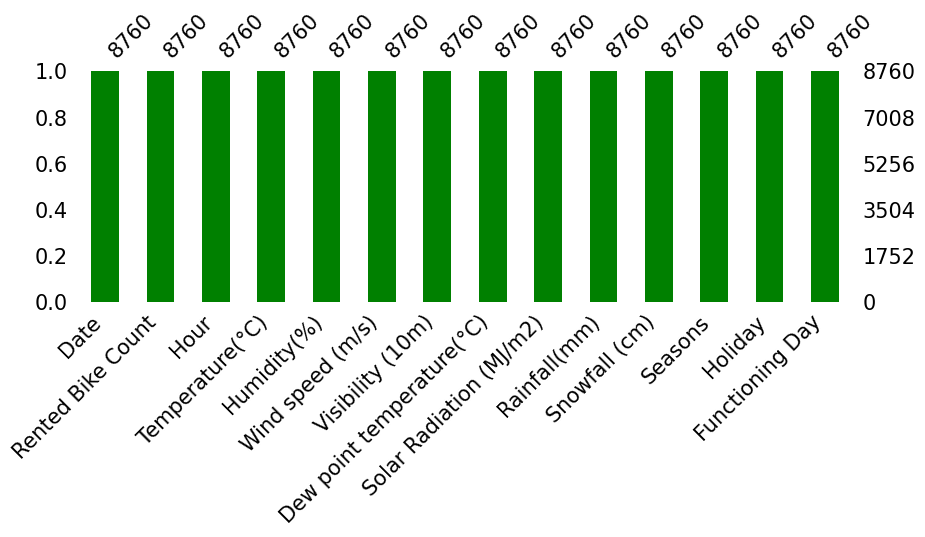

In [ ]:
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

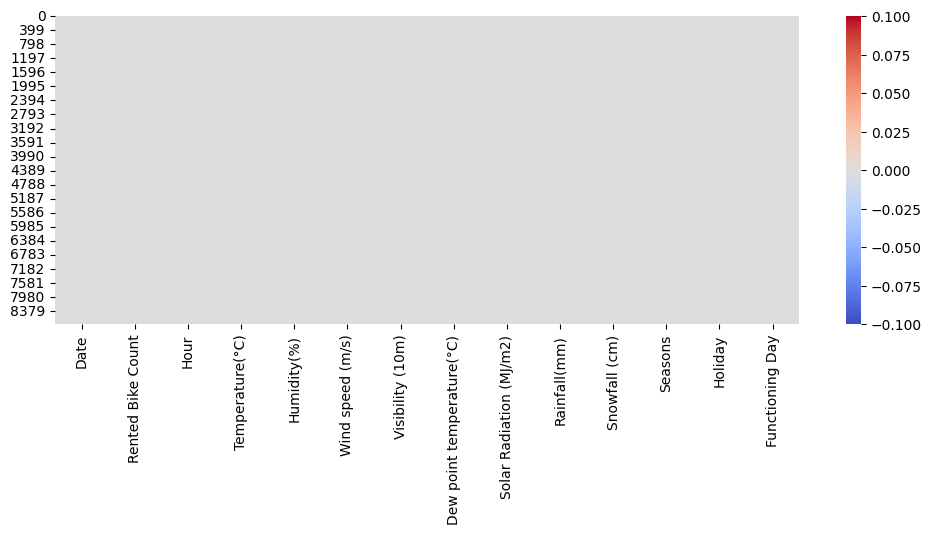

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the output, it has been determined that there is no missing value in any column in the dataset.

## **3. Understanding your variables**

### Columns

In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Statistical Summary

In [ ]:
bike_df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Unique Values

In [ ]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

### Checking Unique values for each variable

In [ ]:
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


### Observations:


We're looking closely at some important parts of our dataset: 'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons'. They have a lot of useful information. We want to use these details to build a model that predicts something (like how many bikes get rented). One thing we're curious about is whether 'Hour' should be treated like categories (like morning, afternoon, evening) or like numbers (1, 2, 3...). We'll try both ways to see what works best.

## **4. EDA**

Exploratory Data Analysis is a crucial step in data science. It's about thoroughly examining the data to understand it better. The main aim of EDA is to find patterns and trends in the data. This helps us to spot any unusual or missing data, which could affect our analysis. EDA is like investigating the data to see what it can tell us.

### **4.1 Creating some new features**


- Renaming complicated column names to simpler ones for easier understanding

In [ ]:
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                 'Temperature(°C)':'temperature',
                                 'Humidity(%)':'humidity',
                                 'Wind speed (m/s)':'wind_speed',
                                 'Visibility (10m)':'visibility',
                                 'Dew point temperature(°C)':'dew_point_temperature',
                                 'Solar Radiation (MJ/m2)':'solar_radiation',
                                 'Rainfall(mm)':'rainfall',
                                 'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

Breaking down date column

In [ ]:
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()
bike_df.drop('date', axis=1, inplace=True)

In [ ]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])


We'll treat the hours of the day like categories, then turn them into numbers to see if it makes a difference in our results.

In [ ]:
def session(x):

    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

bike_df['session'] = bike_df['hour'].apply(session)

### **4.2 Column: 'rented_bike_count'**

In [ ]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


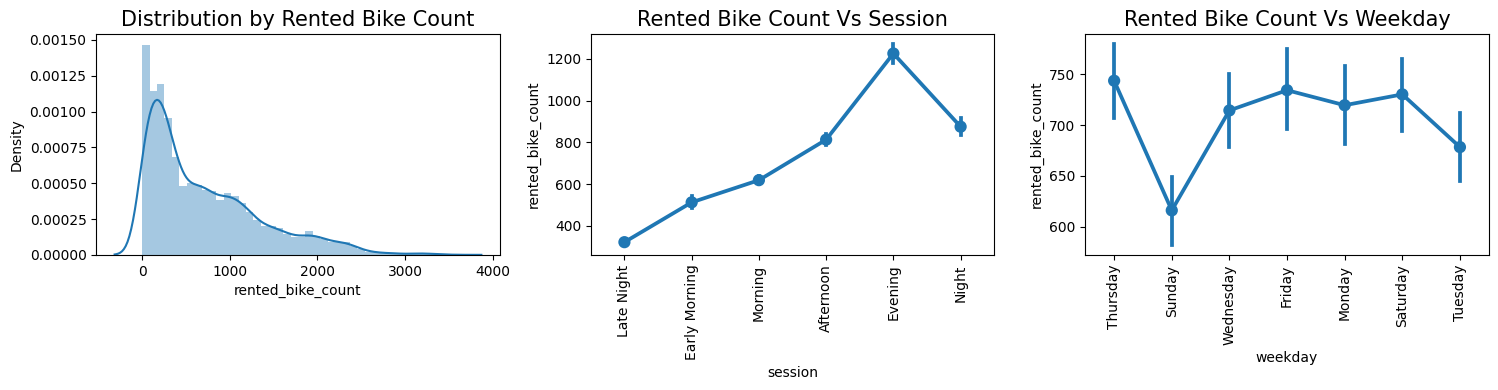

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)

point.set_xticklabels(point.get_xticklabels(), rotation=90)

point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### **Observation**:

1. Distribution of Rented Bike Count is positively skewed and has
many outliers. We will treat it later.

2. Demand for rented bikes increases in the evening.

3. There is the least demand for the rented bike on Sunday.

### **4.3 Column:'hour'**

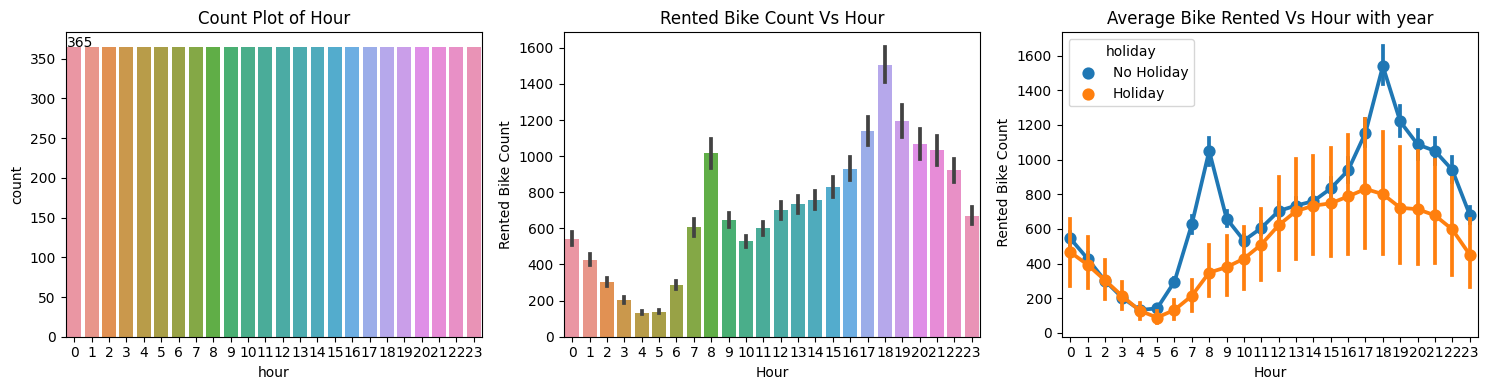

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
    bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
    bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')
    point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
    point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

    plt.tight_layout()
    plt.show()

### **Observation**:

1. In the dataset, every hour has the same number of counts.
More bikes are rented out at 8 AM and 6 PM, especially on weekdays when people are commuting to and from work.

2. On holidays, there's a peak in rentals around 8 AM and 6 PM, likely from locals commuting to work. On non-working days like weekends, rentals are more evenly spread throughout the day, with a peak around noon, probably from tourists exploring the city.

### **4.4 Column:'temperature'**

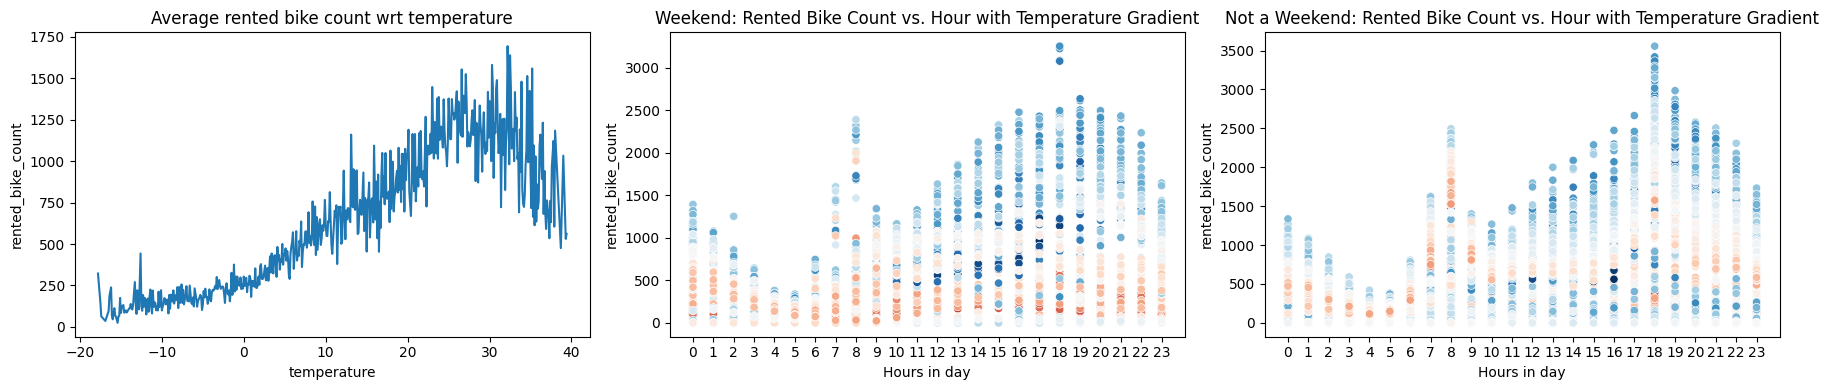

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]
#weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

**Observation**:


Looking at the line plot, we notice that as the temperature rises, the average number of bikes rented also goes up, but it slightly drops at the very highest temperatures. This suggests that people like to rent bikes when it's warm, but when it gets extremely hot, bike rentals decrease slightly.

### **4.5 Column:'humidity'**

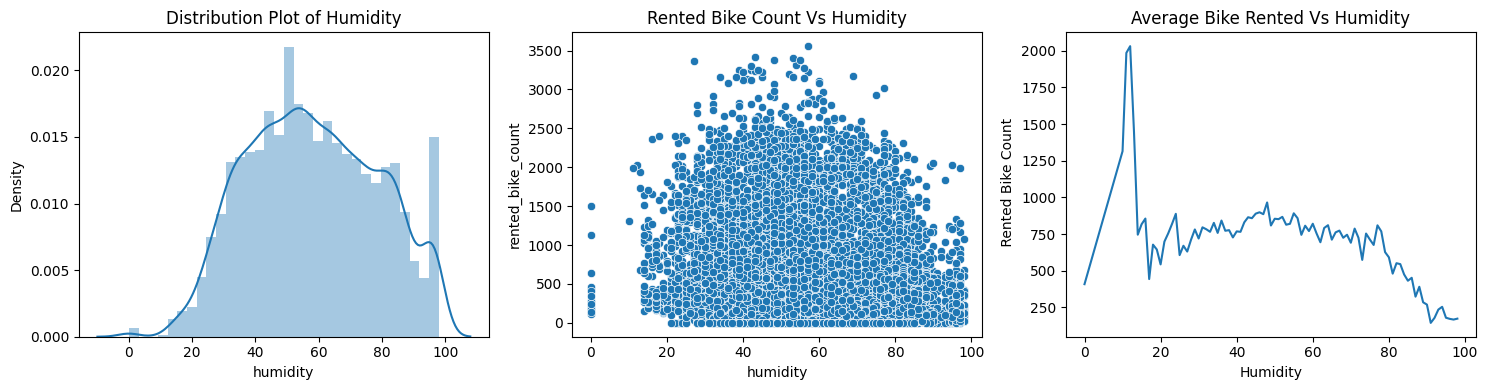

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

 **Observation**:

We can see from the plots above that the average number of bikes rented goes up and down sharply with the peak at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **4.6 Column:'wind_speed'**

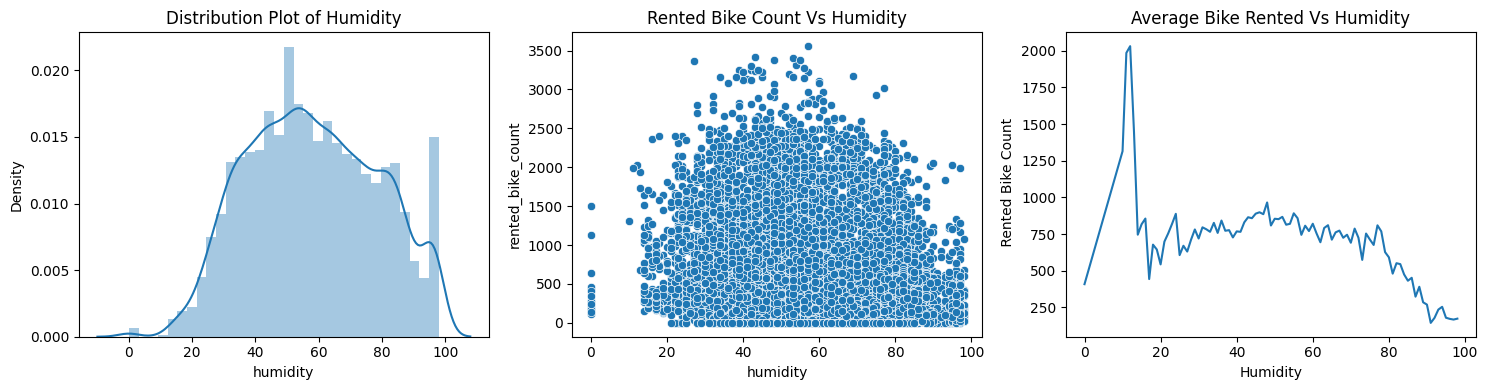

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation**:


Looking at the distribution plot, we notice that wind speed is mostly skewed towards the positive side.

When we look at the scatter plot, we see how wind speed and rented bike count relate to each other.

The line plot shows us that people generally prefer moderate wind, but there's a noticeable increase in bike rentals at a wind speed of 7.

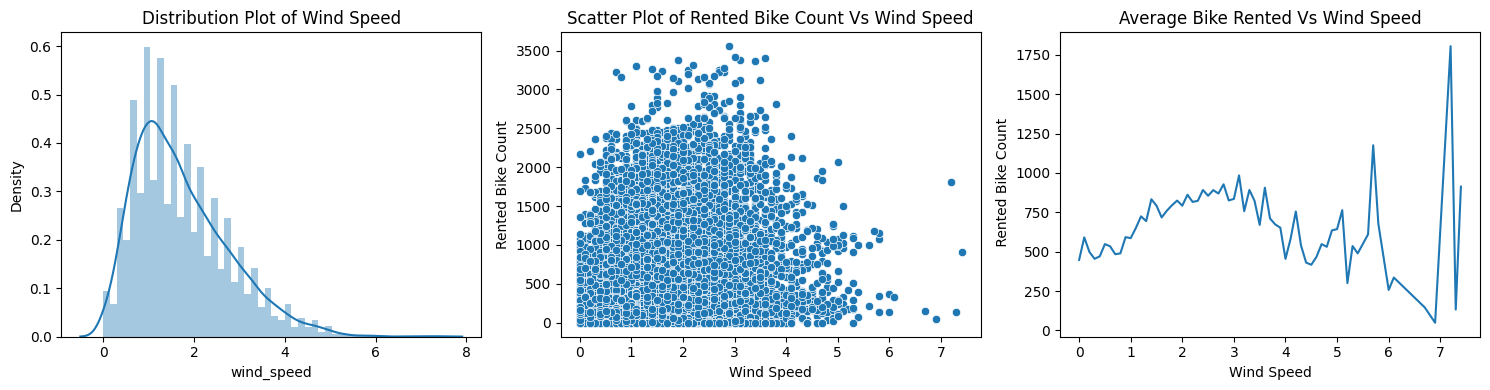

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))


dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

### **4.7 Column:'visibility'**

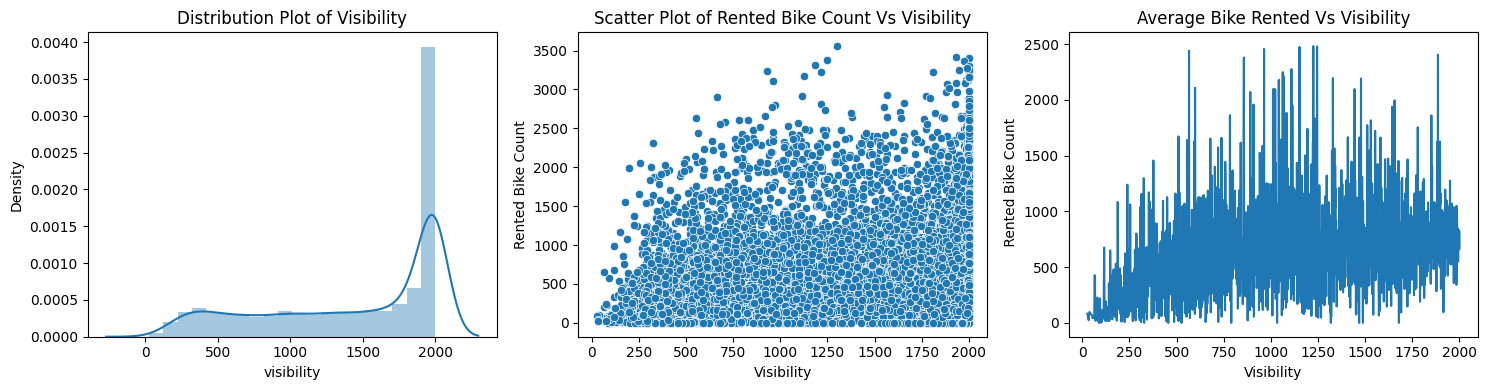

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


**Observation**:

Visibility is highly skewed to the left side.
We can see from these plots above that as visibility rises, so does rented_bike_count


### **4.8 Column:'dew_point_temperature'**

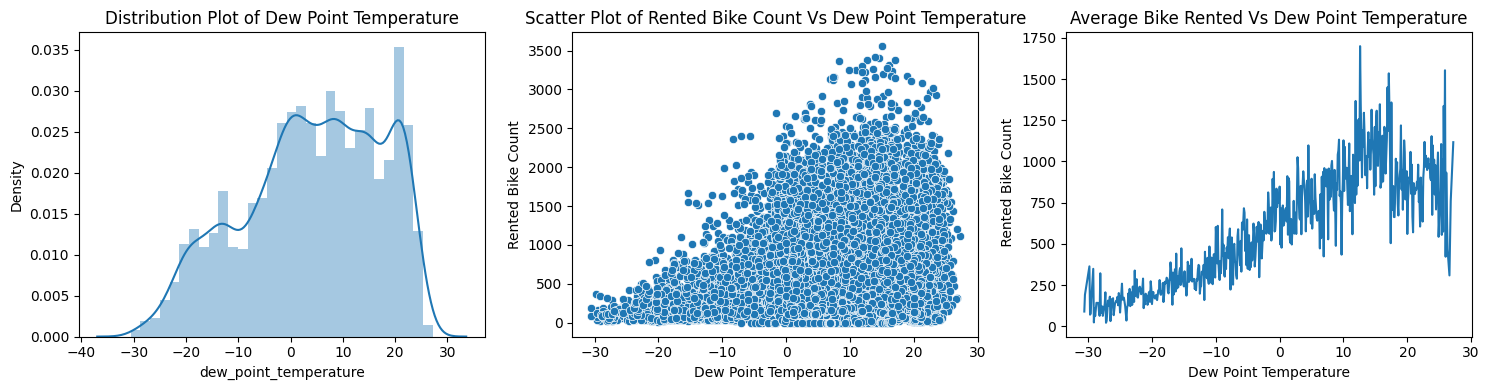

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation**:

Looking at the plots, we notice that dew point temperature tends to skew towards the negative side. There's a clear positive connection between dew point temperature and rented bike count.

As the dew point temperature rises, the average number of bikes rented also goes up, with a slight drop at the highest dew point temperatures.

The line plot for dew point temperature looks quite similar to the pattern we saw for temperature.

### **4.9 Column:'solar_radiation'**

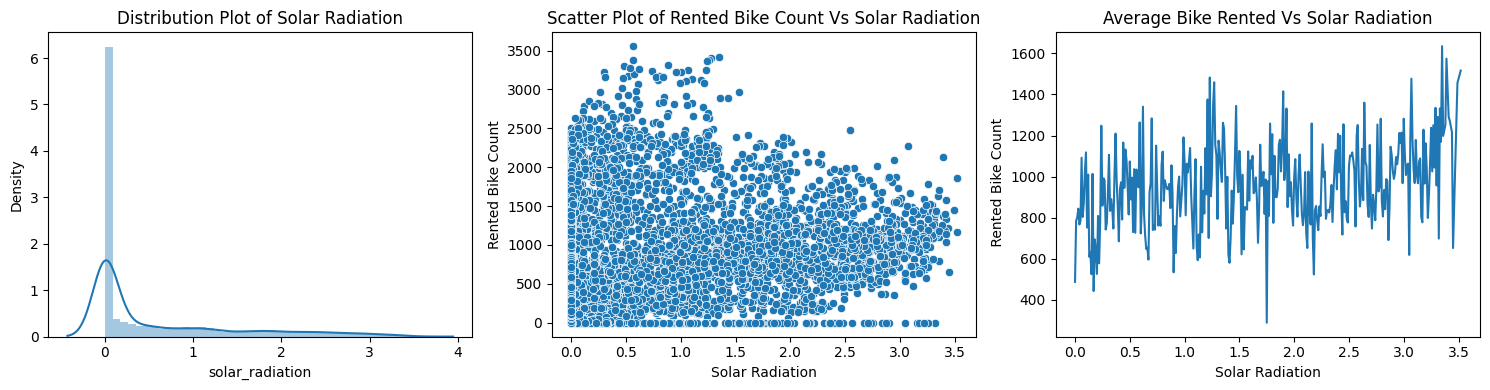

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.solar_radiation, ax = ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

scatter = sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

**Observation:**

Looking at the distribution plot, solar radiation appears highly skewed towards the positive side.

As solar radiation increases, so does the average number of bikes rented.

Moreover, solar radiation is directly linked to the temperature column.

### **4.10 Column:'rainfall'**

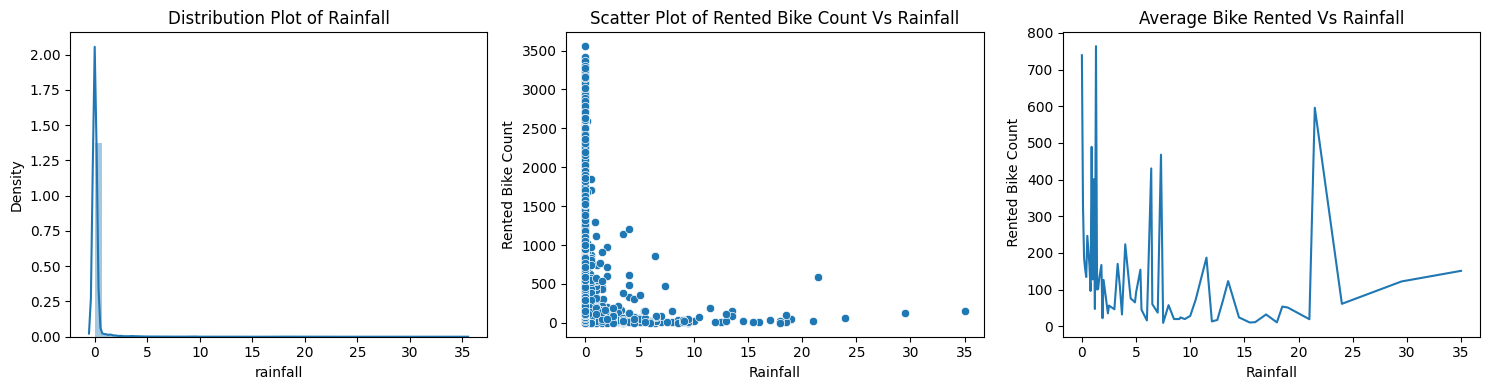

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

**Observation**:

Distribution of rainfall is highly skewed to the positive side

people prefer almost no or very less rainfall

### **4.11 Column:'snowfall'**

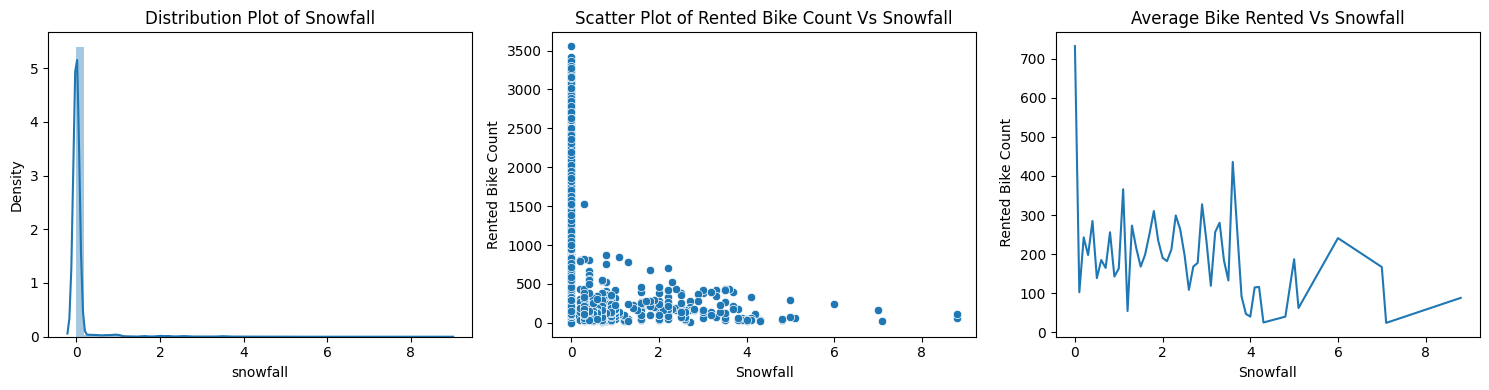

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

 **Observation**:

Distribution of snowfall is highly skewed to the positive side.
People prefer almost no or very less snowfall.

### **4.12 Columns:'seasons'**

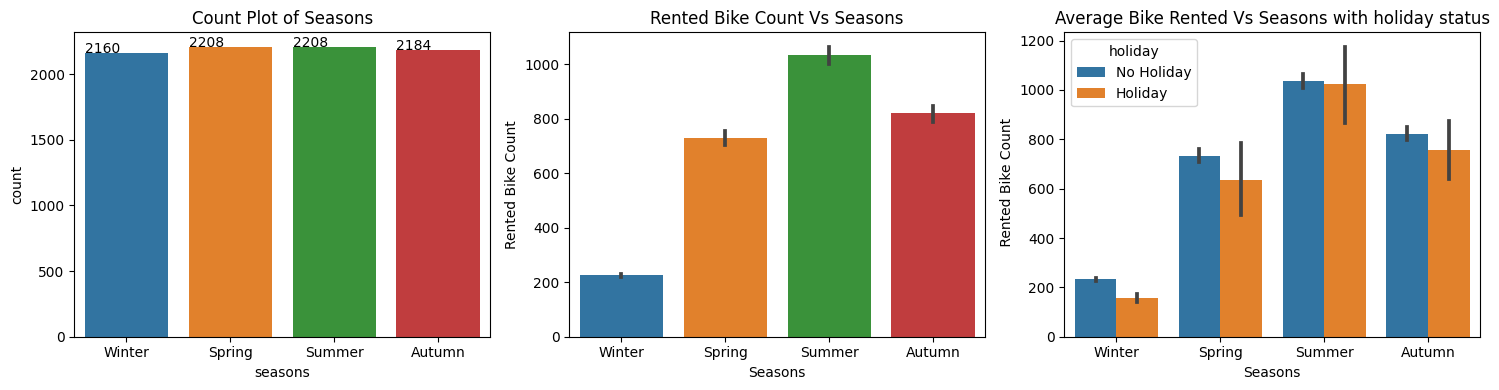

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count = sns.countplot(data=bike_df, x='seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

**Observation**:


In the dataset, there are four seasons, each with more than 2000 counts.

Summer is the most preferred season for bike rentals, while winter is the least preferred, indicating a preference for warmer temperatures.

Regardless of the season, the number of bike rentals is consistently higher on non-holiday days compared to holidays.

### **4.13 Column:'holiday'**

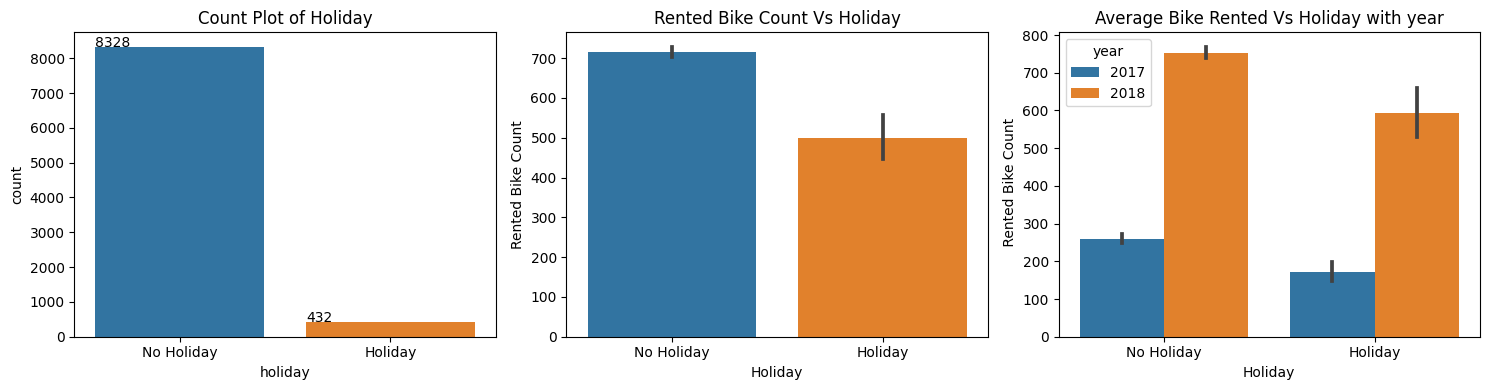

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()

**Observation**:


The dataset contains more records of non-holiday days compared to holidays, which is expected since most days are working days.

On non-holiday days, there's a higher demand for bike sharing compared to holidays, suggesting that business-related bike rentals are favored.

Additionally, there are more records from the year 2018 than from 2017 in the dataset.

### **4.14 Column:'functioning_day'**

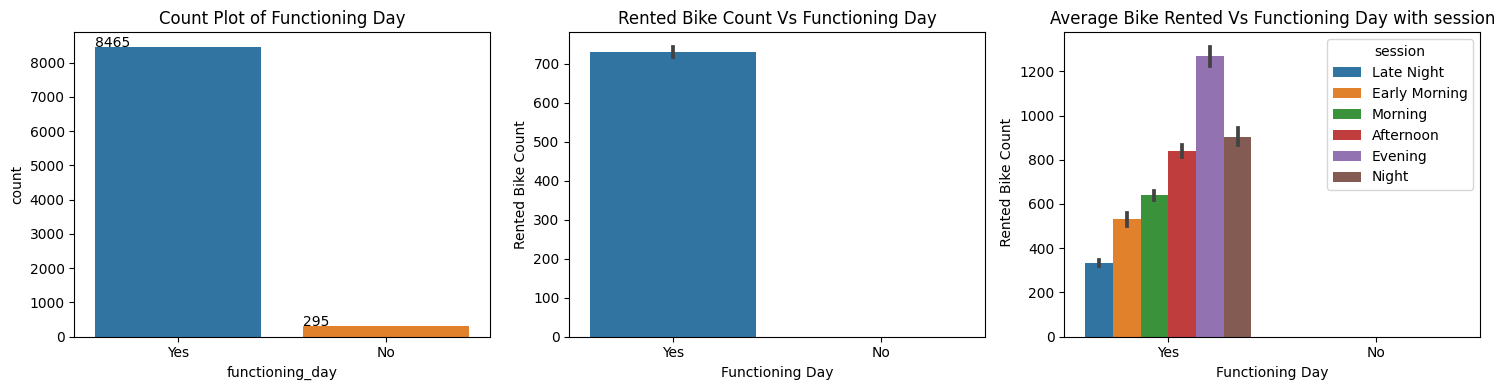

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count = sns.countplot(data=bike_df, x='functioning_day', ax=ax[0])
count.set_title('Count Plot of Functioning Day')

for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

**Observation**:


The dataset contains more records of functioning days than non-functioning days, which is expected since most days are working days.

Although there are some records of non-functioning days, there are no bike rentals observed on those days.

On functioning days, the evening session typically has the highest count of rented bikes.


### **5. Data Cleaning**

To correct or remove the inaccuracies and missing values nd treat the data to improve the accuracy and stuff

**5.1 Duplicate Values**

In [ ]:
bike_df.duplicated().sum()

0

There is No duplicate values in the dataset

**5.2 Missing Values**

In [ ]:
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


<Axes: >

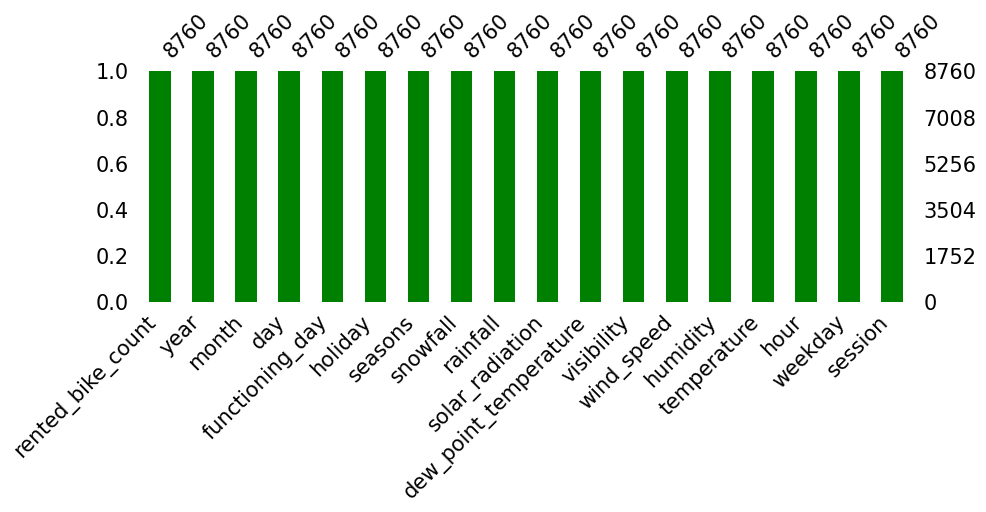

In [ ]:
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

There is no missing values too

### **5.3 Skewness**

In [ ]:
bike_df.describe().T

count         mean         std     min      25%  \
rented_bike_count      8760.0   704.602055  644.997468     0.0   191.00   
hour                   8760.0    11.500000    6.922582     0.0     5.75   
temperature            8760.0    12.882922   11.944825   -17.8     3.50   
humidity               8760.0    58.226256   20.362413     0.0    42.00   
wind_speed             8760.0     1.724909    1.036300     0.0     0.90   
visibility             8760.0  1436.825799  608.298712    27.0   940.00   
dew_point_temperature  8760.0     4.073813   13.060369   -30.6    -4.70   
solar_radiation        8760.0     0.569111    0.868746     0.0     0.00   
rainfall               8760.0     0.148687    1.128193     0.0     0.00   
snowfall               8760.0     0.075068    0.436746     0.0     0.00   
day                    8760.0    15.720548    8.796749     1.0     8.00   
month                  8760.0     6.526027    3.448048     1.0     4.00   
year                   8760.0  2017.915068    0.278796  2017.0  2018.00   

                           50%      75%      max  
rented_bike_count       504.50  1065.25  3556.00  
hour                     11.50    17.25    23.00  
temperature              13.70    22.50    39.40  
humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
visibility             1698.00  2000.00  2000.00  
dew_point_temperature     5.10    14.80    27.20  
solar_radiation           0.01     0.93     3.52  
rainfall                  0.00     0.00    35.00  
snowfall                  0.00     0.00     8.80  
day                      16.00    23.00    31.00  
month                     7.00    10.00    12.00  
year                   2018.00  2018.00  2018.00

The stats show a big gap between the 75th percentile and the max value, suggesting skewness and outliers in the dataset

In [ ]:
numerical_features = []
categorical_features = []
'''
If feature has more than 35 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in bike_df.columns:
  if bike_df[col].nunique() > 35:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features : ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


In [ ]:
numerical_features.remove('rented_bike_count')
numerical_features.remove('rainfall') #highly right skewed
numerical_features.remove('snowfall') #high

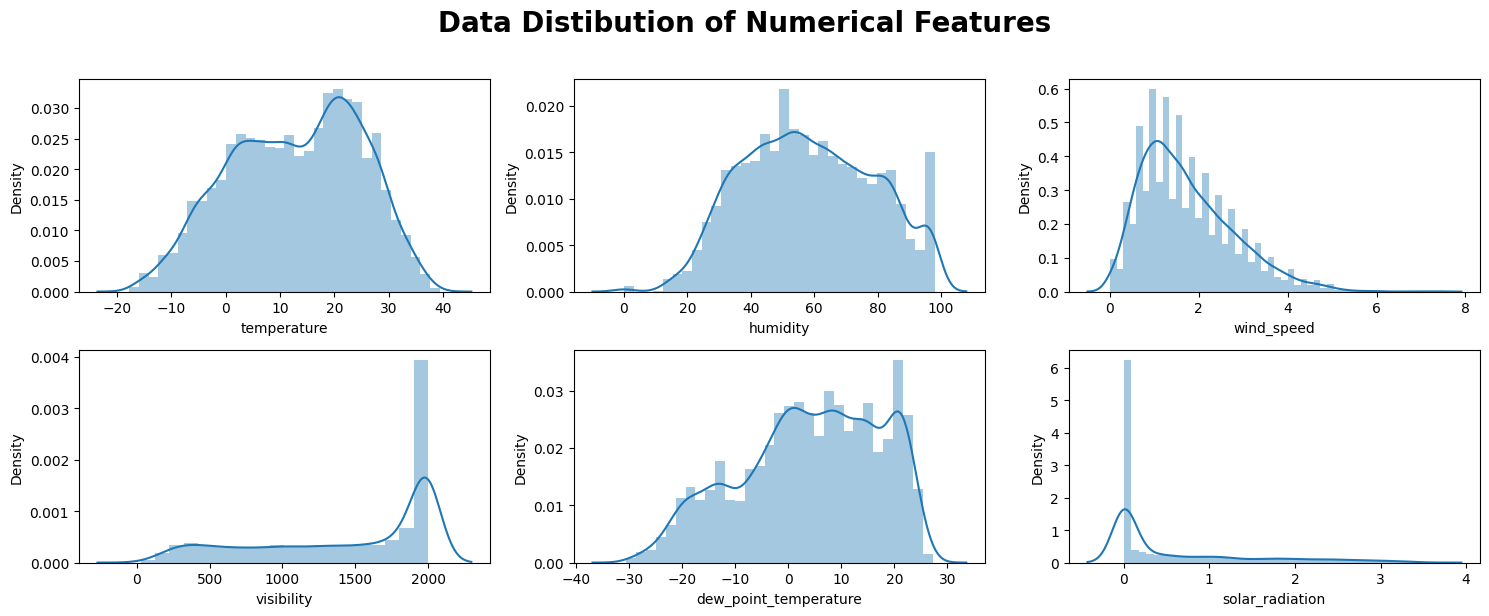

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  sns.distplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

**Observation**

Most numerical features exhibit right-skewed distributions, notably rainfall, snowfall, and solar radiation. These distributions suggest a prevalence of outliers in these columns. Some variables show negative skewness.
Removing outliers may lead certain variables to follow a normal distribution. Thus, it seems prudent to eliminate outliers before considering further transformation techniques. After outlier removal, we can reassess whether transformation is necessary.

### **5.4 Treating Outliers**

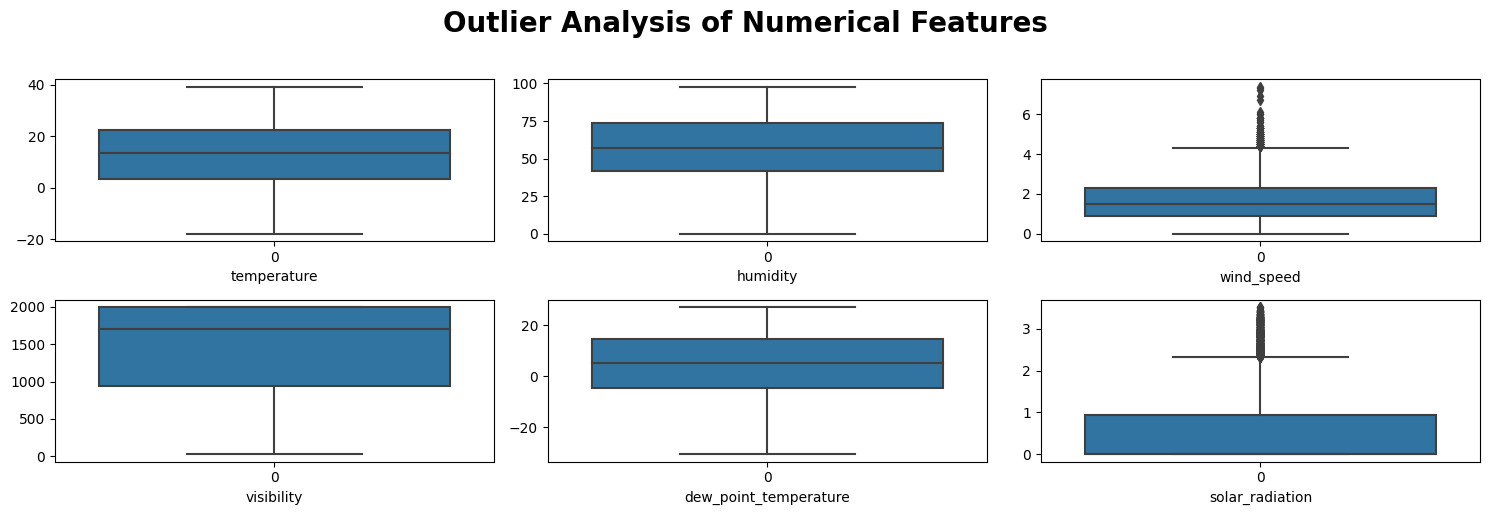

In [ ]:
#now we checking the outliers---->> visible in wind speed and solar radiation
plt.figure(figsize=(15,5))
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  sns.boxplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

**Observation**:

*  Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.
*  Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method


**Clipping Method** : In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range



Now we are going to replace the datapoints with upper and lower bound of all the outliers.

In [ ]:
def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [ ]:
bike_df = clip_outliers(bike_df)

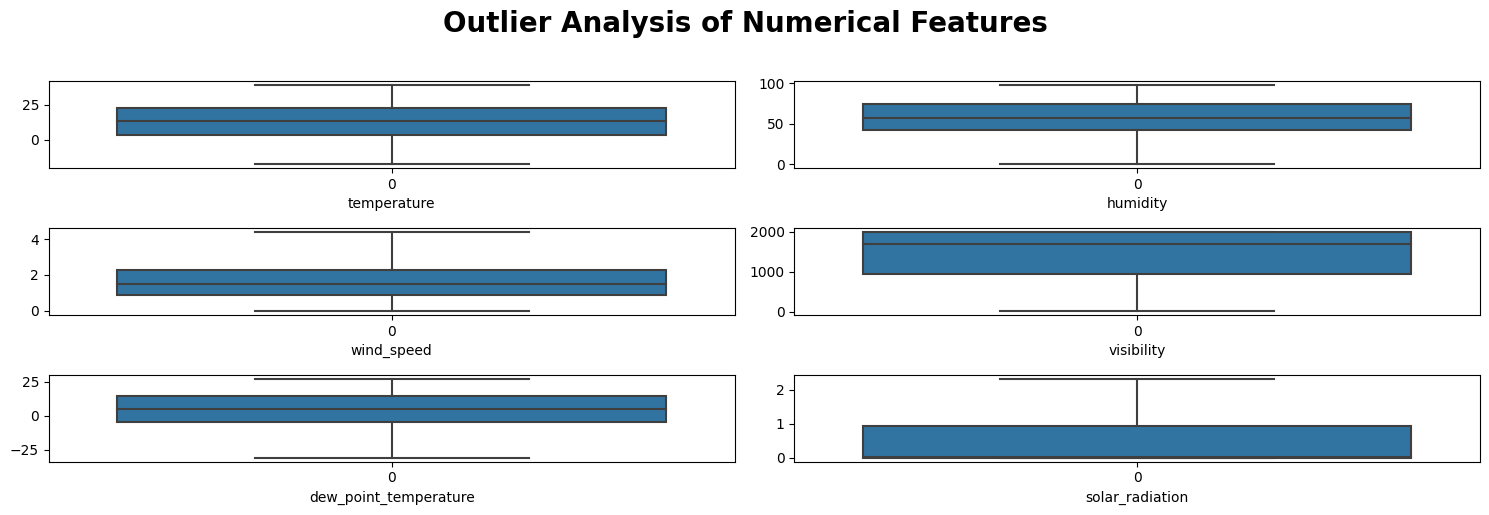

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)            # subplot of 3 rows and 2 columns

  sns.boxplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

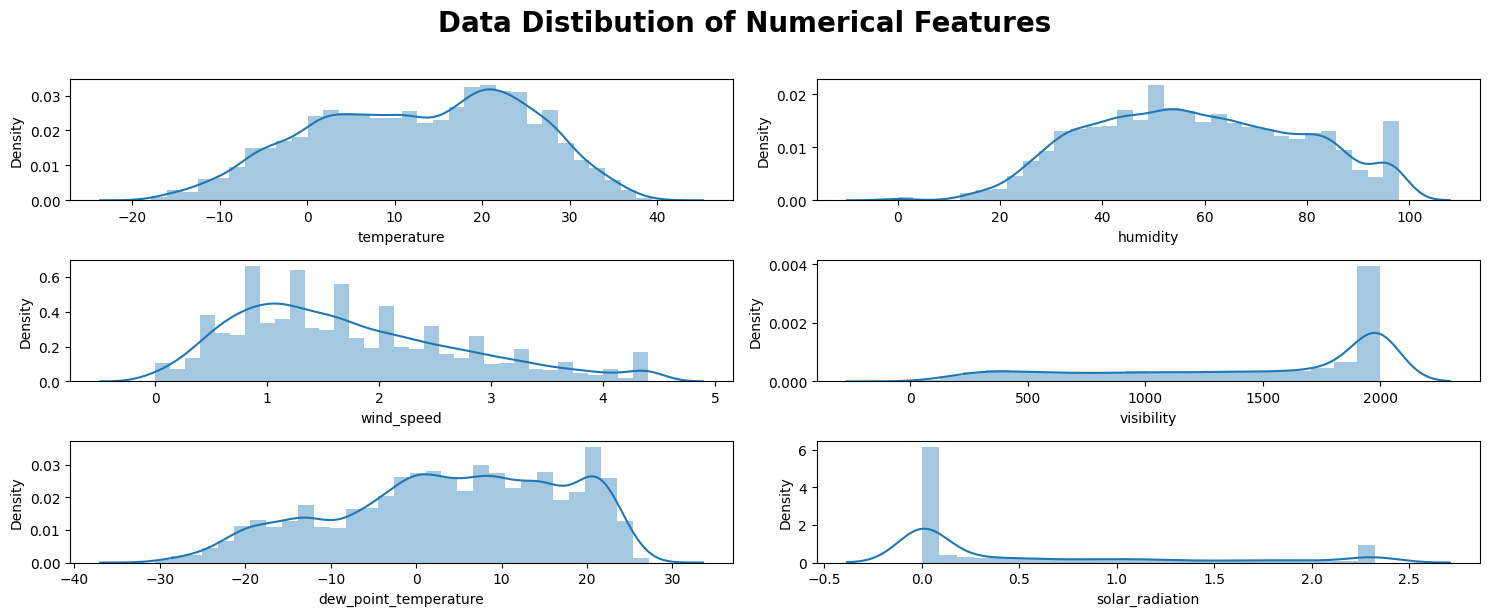

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

  sns.distplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

### We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Feature Engineering**

Feature engineering is like upgrading your data to make it work better for a machine learning model. You can do this by either creating new useful bits from what you already have or by picking out the most important parts. The aim is to make the data easier for the model to understand, which helps it perform better. In short, good features make for a better model.

### **6.1 Regression Plot**

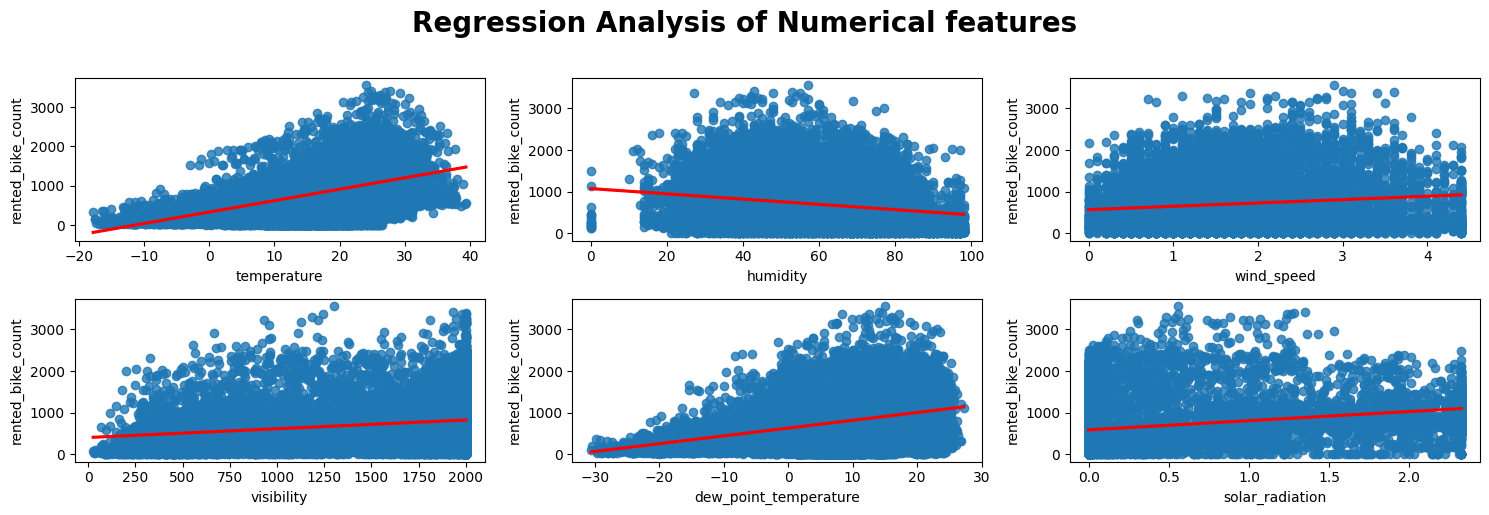

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                     # subplots of 2 rows and 3 columns

  sns.regplot(x=bike_df[col], y='rented_bike_count', data=bike_df, line_kws={"color":"r"})
  plt.xlabel(col)
  plt.tight_layout()

* most of the numerical features are positively correlated to out target variable.

###**6.2 Correlation coefficient and Heatmap**

The correlation coefficient is like a number that shows how closely two things are related. It tells us if one thing goes up or down, how much the other thing is likely to go up or down too. This number ranges from -1 to 1. If it's -1, it means they're perfectly opposite, like when one goes up, the other always goes down. If it's 1, it means they're perfectly related, like when one goes up, the other always goes up too. If it's 0, it means they're not related at all.

In data analysis and machine learning, we use the correlation coefficient to spot connections between things. It helps us decide which features are most important. We can use it to remove features that are too similar, which can make our model work better.


<Axes: >

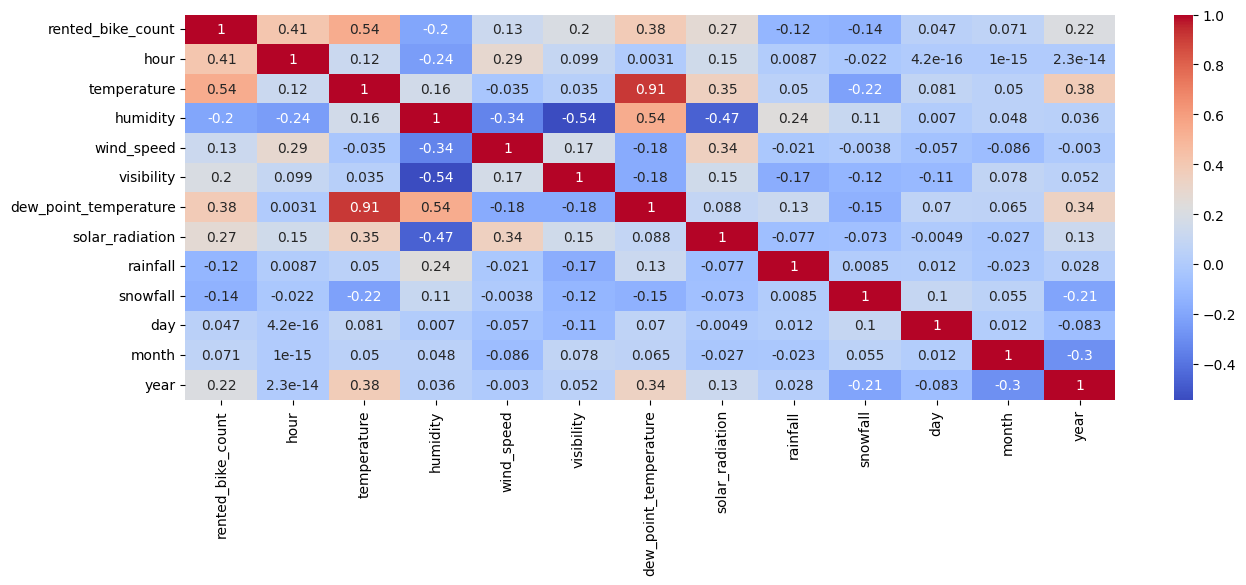

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(bike_df, 0.7)  #checking the highly correlated features-----> and its dew_point_temperature

{'dew_point_temperature'}

* Since dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature

In [ ]:
bike_df.drop('dew_point_temperature', axis=1, inplace=True) #dropping it

### **6.3 VIF**

VIF (Variance Inflation Factor) analysis is a way to see if there's a problem called multicollinearity in our data. Multicollinearity happens when two or more things we're using to predict something are very similar to each other. This can make our predictions less accurate because they're basically saying the same thing.

So, VIF analysis helps us make sure that the things we're using to make predictions are giving us unique information, and that our model is reliable and easy to understand. It's like making sure each ingredient in a recipe adds something special, instead of just repeating what another ingredient already does.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [ ]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.152630  rented_bike_count
1     5.055598               hour
2     4.967449        temperature
3    24.956820           humidity
4     5.052784         wind_speed
5    10.660305         visibility
6     2.904267    solar_radiation
7     1.110419           rainfall
8     1.147299           snowfall
9     4.419318                day
10    4.744662              month
11   64.674491               year

Year has the highest VIF factor, which means it needs to leave

In [ ]:
bike_df.drop('year', axis=1, inplace=True)
bike_df.drop('weekday', axis=1, inplace=True)
bike_df.drop('session', axis=1, inplace=True)

In [ ]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.112963  rented_bike_count
1     4.717261               hour
2     4.455828        temperature
3     7.106271           humidity
4     4.833217         wind_speed
5     5.554467         visibility
6     2.368061    solar_radiation
7     1.104537           rainfall
8     1.136376           snowfall
9     3.859202                day
10    4.640307              month

These are our final numerical variablesto be considered for model building

###**6.4 Encoding**

Encoding is like translating categories into numbers so that computers can understand them better for making predictions.

There are a few ways to do this:

* One-hot encoding: It's like making a checklist for each category. If something belongs to a category, we put a check (1), otherwise, no check (0).
* Label encoding: It's like giving each category a unique number.
* Ordinal encoding: It's like giving categories numbers based on their order.
* Count encoding: It's like replacing categories with how many times they appear in the data.

In [ ]:
categorical_features.remove('year')
categorical_features.remove('weekday')
categorical_features.remove('session')

for i in categorical_features:
  print("No. of unique values in",i,"is",bike_df[i].nunique())

No. of unique values in hour is 24
No. of unique values in seasons is 4
No. of unique values in holiday is 2
No. of unique values in functioning_day is 2
No. of unique values in day is 31
No. of unique values in month is 12


We will use hot encoding for 'seasons' and Numeric encoding for 'holiday' and 'functioning_day'. Other columns are already encoded.

In [ ]:
seasons_onehot = pd.get_dummies(bike_df['seasons'], prefix='seasons')

bike_df.drop('seasons', axis=1, inplace=True)
bike_df = pd.concat([bike_df, seasons_onehot], axis=1)

In [ ]:
bike_df['holiday'] = bike_df['holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_df['functioning_day'] = bike_df['functioning_day'].map({'Yes': 1, 'No': 0})

### **6.5 Normalization of Target Variable**

Data normalization, also called data pre-processing, is a basic part of data mining. It means changing the data so it's easier to work with. The main aim is to get rid of duplicate data or make it easier to spot.

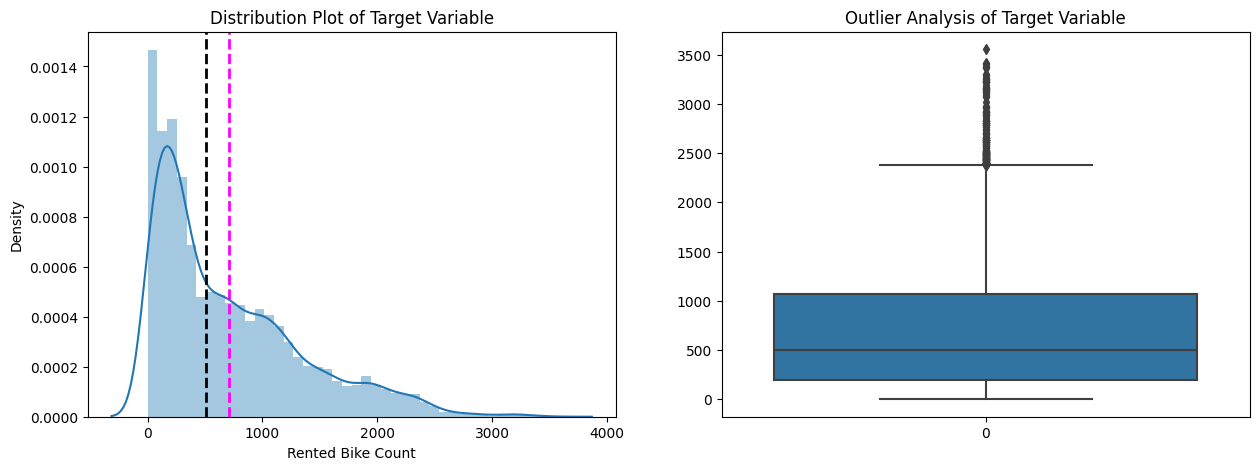

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5)) #**nORMALIZATION OF TARGET VARIABLE

dist =sns.distplot(bike_df['rented_bike_count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

dist.axvline(bike_df['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)

dist.axvline(bike_df['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

box = sns.boxplot(bike_df.rented_bike_count, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

**Observation**:


The graph shows that the Rented Bike Count is moderately skewed to the right. Linear regression expects the dependent variable to follow a normal distribution. To meet this assumption, we should take steps to normalize the distribution.
The boxplot reveals the presence of outliers in the rented bike count column.

<Axes: xlabel='rented_bike_count', ylabel='Density'>

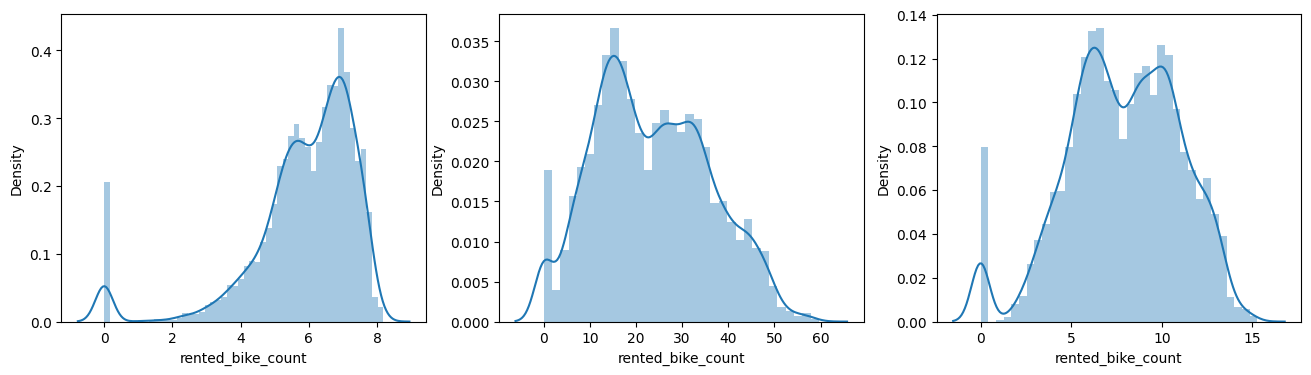

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(16,4)) #KDE means kernel density estimation

sns.distplot(np.log1p(bike_df['rented_bike_count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(bike_df['rented_bike_count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(bike_df['rented_bike_count']),kde=True, ax=axs[2])

**Observations**
* Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.
* Square root and cube root transformations were attempted, but they did not result in a normally distributed variable.
* Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

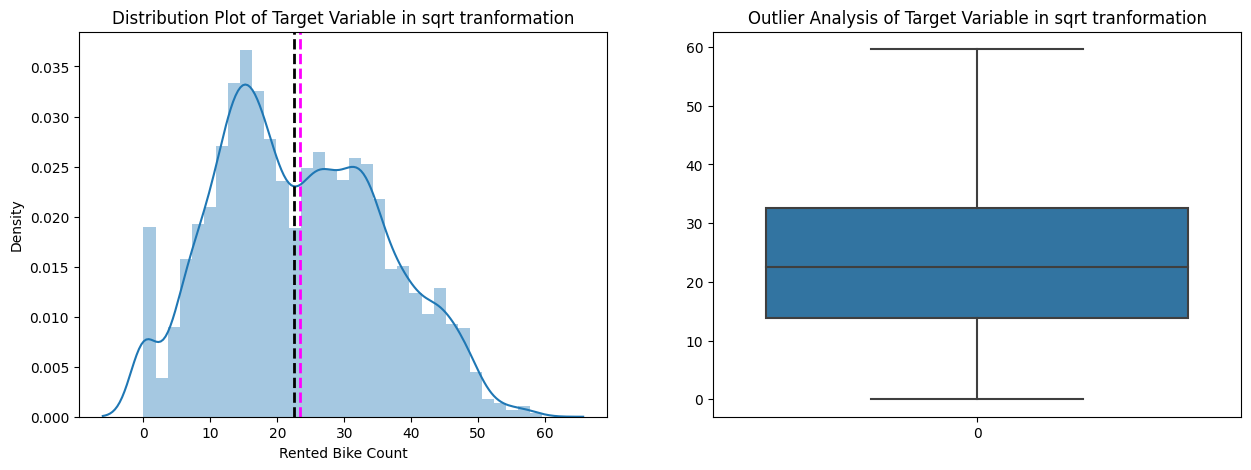

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

dist =sns.distplot(np.sqrt(bike_df['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

dist.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)

dist.axvline(np.sqrt(bike_df['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

box = sns.boxplot(np.sqrt(bike_df.rented_bike_count), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

**Observation**
* By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
* We find that there are no outliers in the Rented Bike Count column after applying square root transformation.

###**Manipulations done and insights found**


* We observed that most of the numerical features have a positive correlation with our target variable.
* After examining the heatmap and correlation coefficients, we noticed a high correlation (0.91) between dew_point_temperature and temperature. Since dew_point_temperature is less correlated with our target variable, we decided to drop it.
* To address multicollinearity, we conducted a VIF analysis and discovered that the VIF factor of 'year' was too high. Consequently, we removed the 'year' feature from our dataset.
* Categorical features were encoded to make them understandable for the model. We used one-hot encoding for 'seasons' and numeric encoding for 'holiday' and 'functioning_day'. Other columns were already encoded.
* We attempted various transformations on our target variable. Logarithmic transformation did not yield significant improvement as it resulted in a negatively skewed distribution. We also tried square root and cube root transformations, but they didn't result in a normal distribution either. Therefore, we opted for a square root transformation, which provided a more evenly distributed variable for regression.


##**7. Model Building**

###**7.1 Train Test Split**

In [ ]:
X = bike_df.drop('rented_bike_count', axis=1)
y= np.sqrt(bike_df['rented_bike_count']) #SQR ROOT transformation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


### **7.2 Scaling Data**

In [ ]:
scaler = StandardScaler() #we scaling now

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Evaluation Metrics Used-**


* **Mean Squared Error (MSE):** This metric assesses how close a regression line is to a set of points by measuring the average of the squared differences between predicted and actual values.

* **Root Mean Square Error (RMSE):** RMSE is the standard deviation of the residuals, which are the differences between predicted and actual values. It provides a measure of the model's accuracy.

* **Mean Absolute Error (MAE):** MAE evaluates the performance of a regression model by measuring the average absolute differences between predicted and actual values.

* **R-squared (R2):** R2 is a statistical measure that indicates the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, with higher values indicating better model fit.

* **Adjusted R-squared:** Adjusted R-squared is a modification of R-squared that considers the number of predictors in the model, providing a more accurate measure of model fit when dealing with multiple predictors.


###**7.3 Model Building**

In [ ]:
model_result = []

def predict(ml_model,model_name):

  model = ml_model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

#**8. Model Implementation**

####**8.1 Linear Regression**

Linear regression is a statistical technique used to understand and predict the relationship between a dependent variable and one or more independent variables. It works by fitting a straight line to the observed data points. The aim is to find the line that best represents the relationship between the variables, allowing us to predict the value of the dependent variable based on the values of the independent variables.

train MSE : 54.121
train RMSE : 7.357
train MAE : 5.638
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.094
test RMSE : 7.287
test MAE : 5.618
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


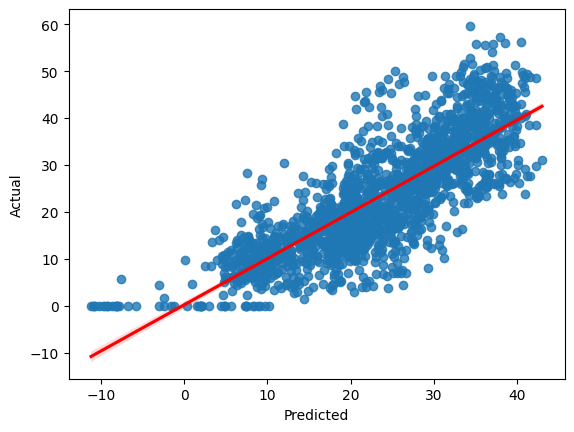

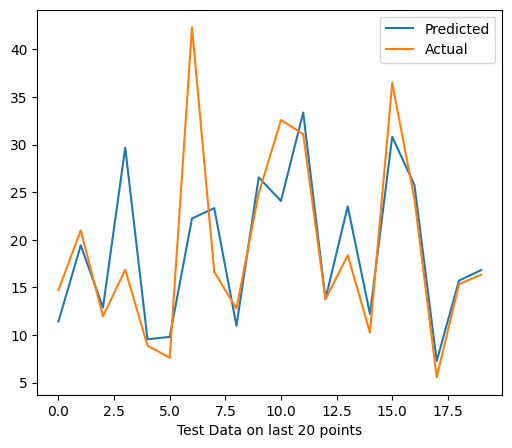

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.427173  19.415339  12.875658  29.677927  9.551247
error       3.303747   1.560838  -0.917397 -12.825627 -0.663053
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(LinearRegression(), 'LinearRegression')

####**8.2 Lasso**

Lasso, which stands for Least Absolute Shrinkage and Selection Operator, is a method used in linear regression to simplify the model and enhance its ability to generalize. It achieves this by penalizing the size of the coefficients of the features.

In lasso regularization, a penalty term is added to the loss function being optimized. This penalty term is directly related to the absolute size of the coefficients. Unlike ridge regression, lasso has the unique property of shrinking the coefficients of certain features all the way to zero. This essentially removes those features from the model, helping to simplify it further.

train MSE : 54.273
train RMSE : 7.367
train MAE : 5.648
train R2 : 0.652
train Adj R2 : 0.651
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.316
test RMSE : 7.302
test MAE : 5.636
test R2 : 0.647
test Adj R2 : 0.643
------------------------------------------------------------------------------------------------------------------------------------------------------


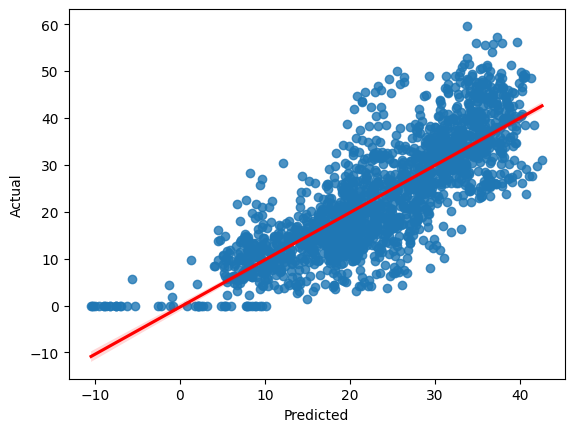

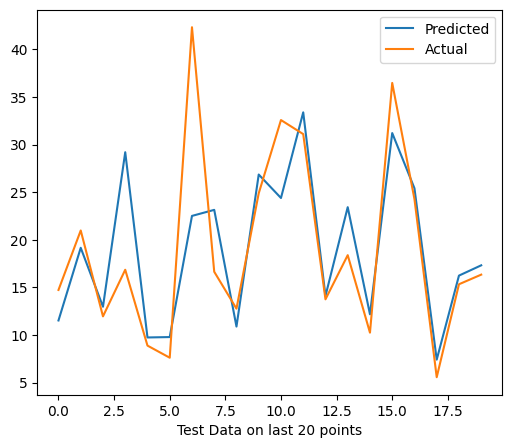

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.527884  19.156742  12.969024  29.194785  9.742650
error       3.203035   1.819435  -1.010763 -12.342486 -0.854456
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

####**8.3 Ridge**

Ridge Regression is a form of linear regression that addresses issues like multicollinearity and overfitting. It achieves this by incorporating a penalty term into the loss function. This penalty term, known as the L2 regularization term or weight decay term, adds a penalty proportional to the square of the coefficients' magnitude.

train MSE : 54.119
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.108
test RMSE : 7.288
test MAE : 5.621
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


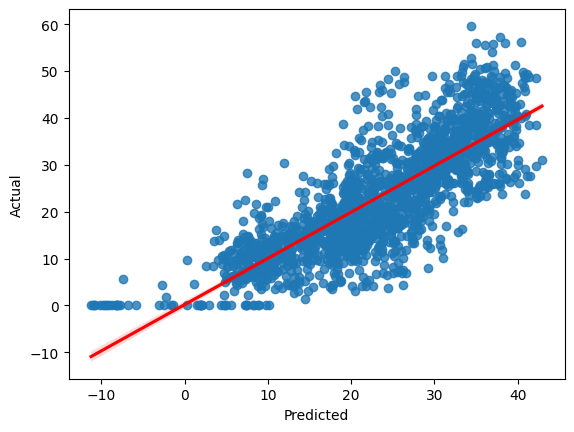

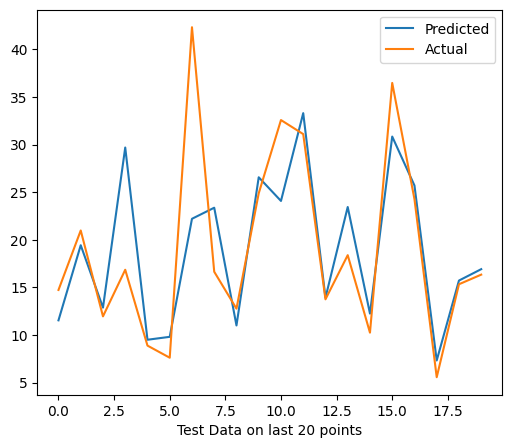

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.541139  19.427637  12.875583  29.687544  9.503152
error       3.189781   1.548540  -0.917322 -12.835244 -0.614958
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

### **8.4 Elastic Net**

ElasticNet is a linear regression algorithm that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. L1 and L2 regularization are methods used to prevent overfitting by adding penalty terms to the loss function that the algorithm minimizes. Lasso adds a penalty proportional to the absolute value of the coefficients, while Ridge adds a penalty proportional to the square of the coefficients.

train MSE : 54.593
train RMSE : 7.389
train MAE : 5.677
train R2 : 0.65
train Adj R2 : 0.649
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.911
test RMSE : 7.342
test MAE : 5.68
test R2 : 0.643
test Adj R2 : 0.639
------------------------------------------------------------------------------------------------------------------------------------------------------


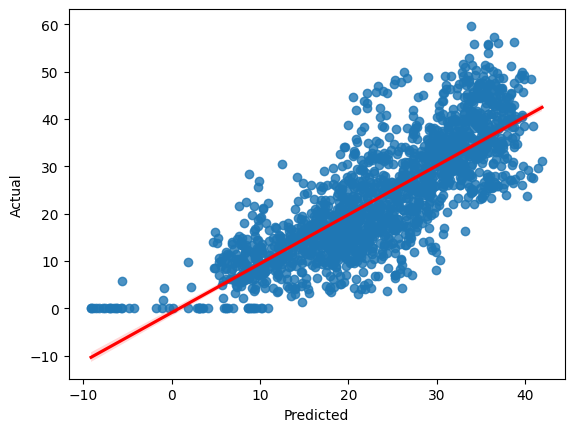

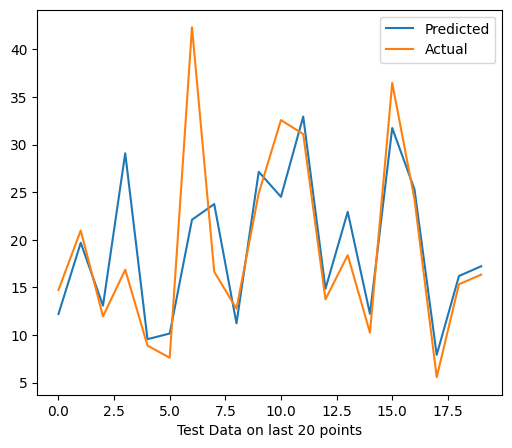

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  12.208831  19.684402  13.083575  29.085248  9.563631
error       2.522089   1.291775  -1.125315 -12.232948 -0.675436
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net')

### **8.5 K-Nearest Neighbors**


A supervised machine learning algorithm known as KNN or K-nearest neighbor can be used to solve classification and regression problems. K is not a non-parametric nearest neighbor, i.e. It makes no assumptions regarding the assumptions that underlie the data. An input or unseen data set is categorized here by the algorithm based on the characteristics shared by the closest data points. The distance between two points determines these closest neighbors. The distance metric methods that are utilized can be Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc)

train MSE : 12.718
train RMSE : 3.566
train MAE : 2.361
train R2 : 0.918
train Adj R2 : 0.918
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.575
test RMSE : 5.155
test MAE : 3.577
test R2 : 0.824
test Adj R2 : 0.822
------------------------------------------------------------------------------------------------------------------------------------------------------


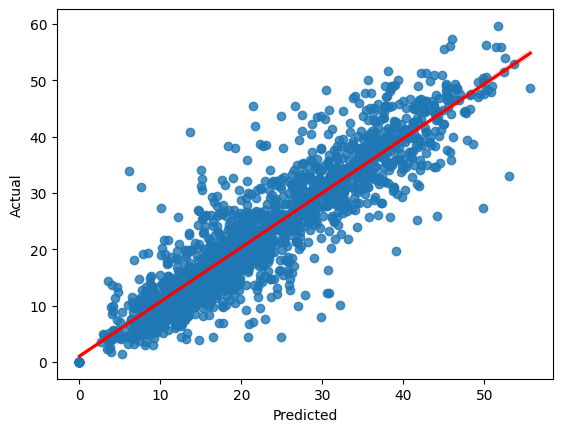

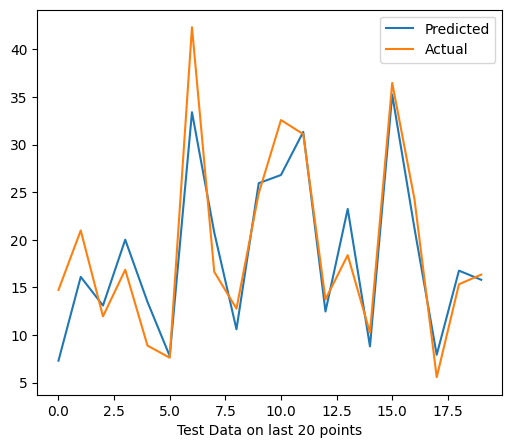

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   7.304707  16.104447  13.096839  20.009112  13.478800
error       7.426213   4.871730  -1.138579  -3.156813  -4.590605
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

###**8.6 Support Vector Machine**

Support Vector Machine (SVM) is a widely used and effective machine learning algorithm used for both classification and regression tasks. It operates by identifying the optimal hyperplane that divides the data into classes or predicts target values in regression problems.

train MSE : 20.542
train RMSE : 4.532
train MAE : 2.685
train R2 : 0.868
train Adj R2 : 0.868
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.094
test RMSE : 5.108
test MAE : 3.326
test R2 : 0.827
test Adj R2 : 0.825
------------------------------------------------------------------------------------------------------------------------------------------------------


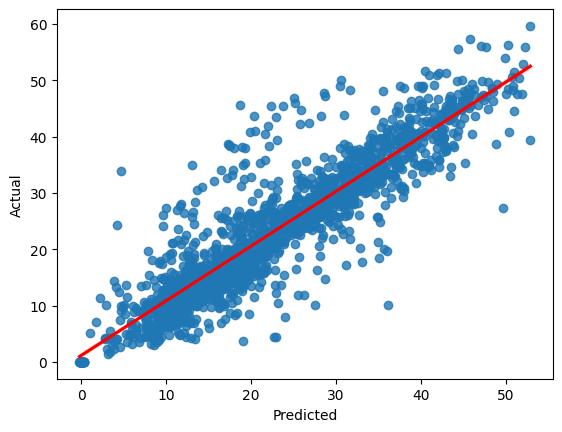

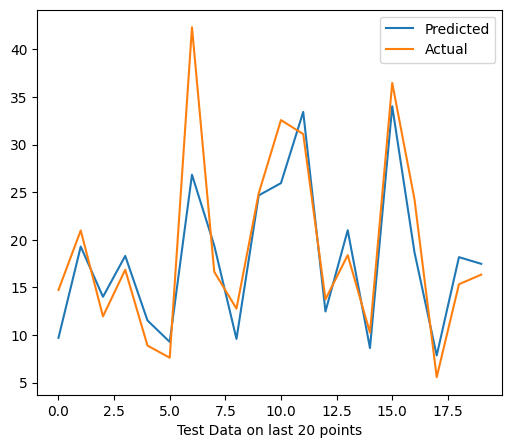

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   9.706634  19.286284  14.011428  18.305715  11.528854
error       5.024286   1.689893  -2.053167  -1.453416  -2.640660
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(SVR(kernel='rbf',C=100), 'SVM')

###**8.7 Decision Tree**

A decision tree is a model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller subsets, based on the values of input features.

In a decision tree, each node represents a test on a feature, and each branch represents the outcome of that test. The final branches of the tree, known as leaves, represent the predictions or decisions. The tree is constructed recursively by selecting the best feature to split the data based on criteria like information gain or impurity reduction at each node.

train MSE : 15.422
train RMSE : 3.927
train MAE : 2.736
train R2 : 0.901
train Adj R2 : 0.901
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 20.416
test RMSE : 4.518
test MAE : 3.157
test R2 : 0.865
test Adj R2 : 0.863
------------------------------------------------------------------------------------------------------------------------------------------------------


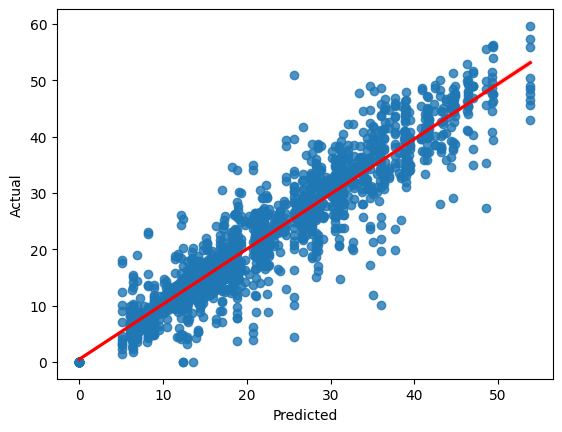

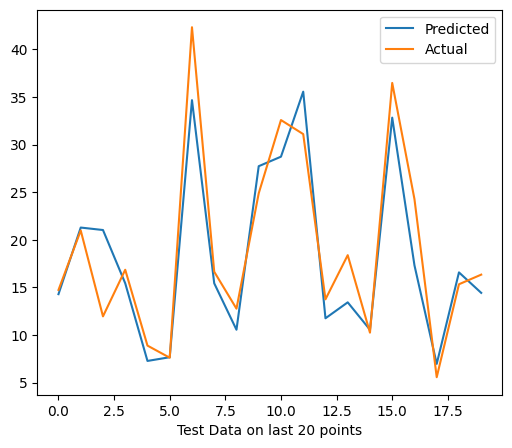

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.290624  21.283637  21.024986  15.430529  7.277687
error       0.440296  -0.307460  -9.066725   1.421771  1.610507
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

####**8.3 Random Forest**

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

**Hyperparameter Tunning using GridSearchCV**

In [ ]:
param_grid = {'n_estimators': [50,80],
             'max_depth': [15,20],
             'min_samples_split': [5,15],
             'min_samples_leaf': [3,5]}


rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [ ]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

train MSE : 5.559
train RMSE : 2.358
train MAE : 1.58
train R2 : 0.964
train Adj R2 : 0.964
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.95
test RMSE : 3.867
test MAE : 2.635
test R2 : 0.901
test Adj R2 : 0.9
------------------------------------------------------------------------------------------------------------------------------------------------------


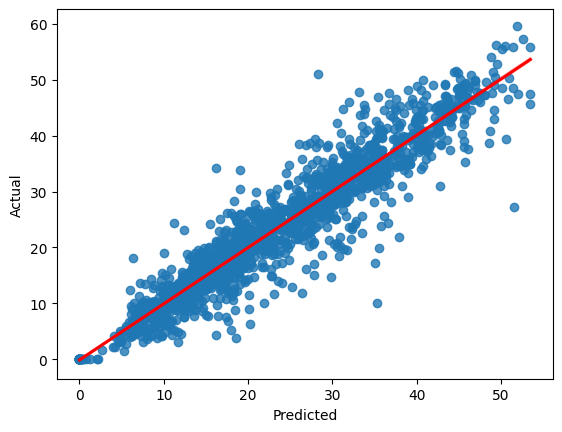

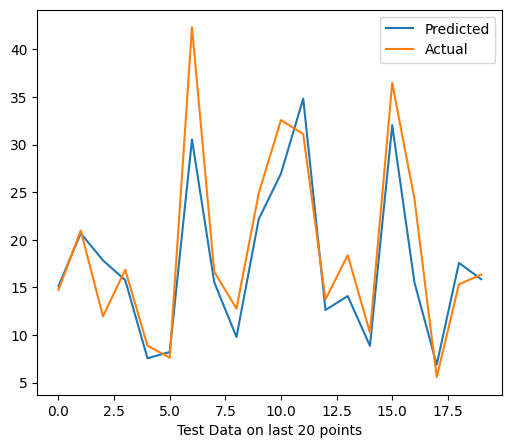

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.122828  20.685348  17.840198  15.757422  7.556246
error      -0.391908   0.290829  -5.881937   1.094877  1.331948
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(rf_optimal_model, 'Random Forest')

####**Model EXplainability**

In [ ]:
importances = rf_optimal_model.feature_importances_
importance_dict = {'Feature' : list(X.columns), #created dictionary here
                   'Feature Importance' : importances}

importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature            0.277490
0              hour            0.258258
9   functioning_day            0.173739
6          rainfall            0.083476
2          humidity            0.071470
15   seasons_Winter            0.048991
5   solar_radiation            0.029921
10              day            0.011321
4        visibility            0.010751
3        wind_speed            0.009576
11            month            0.008058
12   seasons_Autumn            0.007870
13   seasons_Spring            0.004708
7          snowfall            0.002003
8           holiday            0.001430
14   seasons_Summer            0.000938

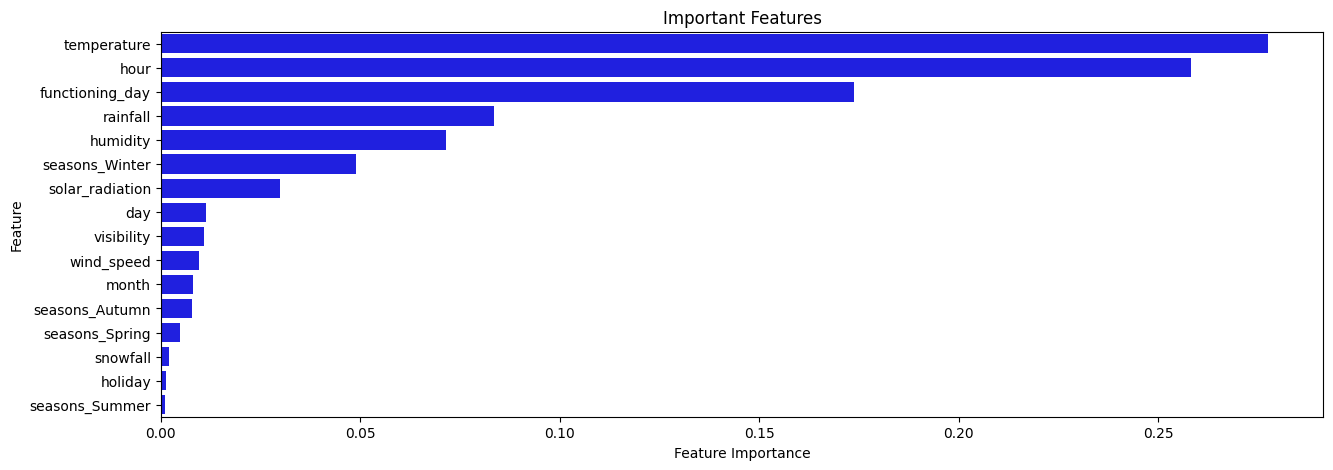

In [ ]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in Random Forest are temperature, hour, functioning_day, rainfall and humidity.

####** 8.9 AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak models to form a stronger model. It works by assigning weights to the data points in a dataset and iteratively building weak models that try to correctly classify or predict the target variable. After each iteration, the weights of the misclassified or mispredicted data points are increased, making it more likely that the next weak model will focus on these points.


train MSE : 2.248
train RMSE : 1.499
train MAE : 1.121
train R2 : 0.986
train Adj R2 : 0.986
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.13
test RMSE : 3.759
test MAE : 2.575
test R2 : 0.906
test Adj R2 : 0.905
------------------------------------------------------------------------------------------------------------------------------------------------------


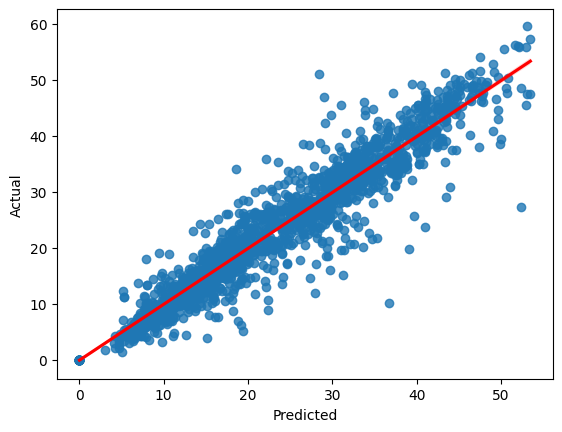

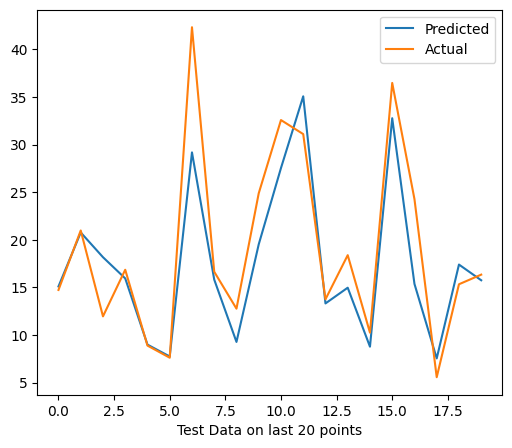

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.099669  20.764905  18.169415  15.943072  8.990378
error      -0.368749   0.211272  -6.211154   0.909228 -0.102183
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
dt = DecisionTreeRegressor(max_depth=12)

ada = AdaBoostRegressor(base_estimator=dt, n_estimators=60, learning_rate=1, random_state =33)

predict(ada, 'AdaBoost')

####**8.10 Xtreme Gradient Boosting**

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

**HyperParameter Tunning using GridSearchCV**

In [ ]:
param_grid = {'n_estimators': [300,500],
              'max_depth': [7,8],
             'min_samples_split': [3,5],
             'min_samples_leaf': [3,5]}
xgb = XGBRegressor()

grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [ ]:
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=300, n_jobs=None, ...)

train MSE : 0.07
train RMSE : 0.265
train MAE : 0.18
train R2 : 1.0
train Adj R2 : 1.0
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.524
test RMSE : 3.395
test MAE : 2.273
test R2 : 0.924
test Adj R2 : 0.923
------------------------------------------------------------------------------------------------------------------------------------------------------


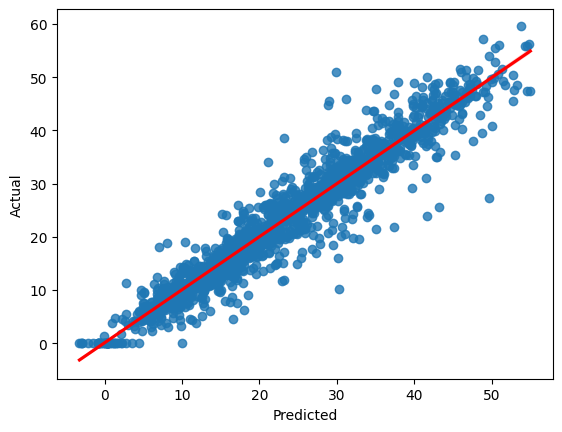

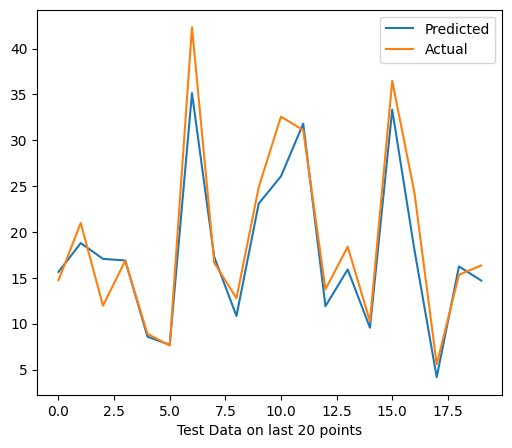

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.640075  18.787737  17.063442  16.890543  8.579092
error      -0.909155   2.188440  -5.105181  -0.038243  0.309102
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(xgb_optimal_model, 'XGB')

####**Model Explainability**

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   functioning_day            0.506654
15   seasons_Winter            0.348386
6          rainfall            0.068379
1       temperature            0.016173
0              hour            0.016047
12   seasons_Autumn            0.011387
8           holiday            0.007581
2          humidity            0.006061
5   solar_radiation            0.005394
14   seasons_Summer            0.003088
7          snowfall            0.002920
11            month            0.002158
10              day            0.001959
13   seasons_Spring            0.001660
4        visibility            0.001214
3        wind_speed            0.000940

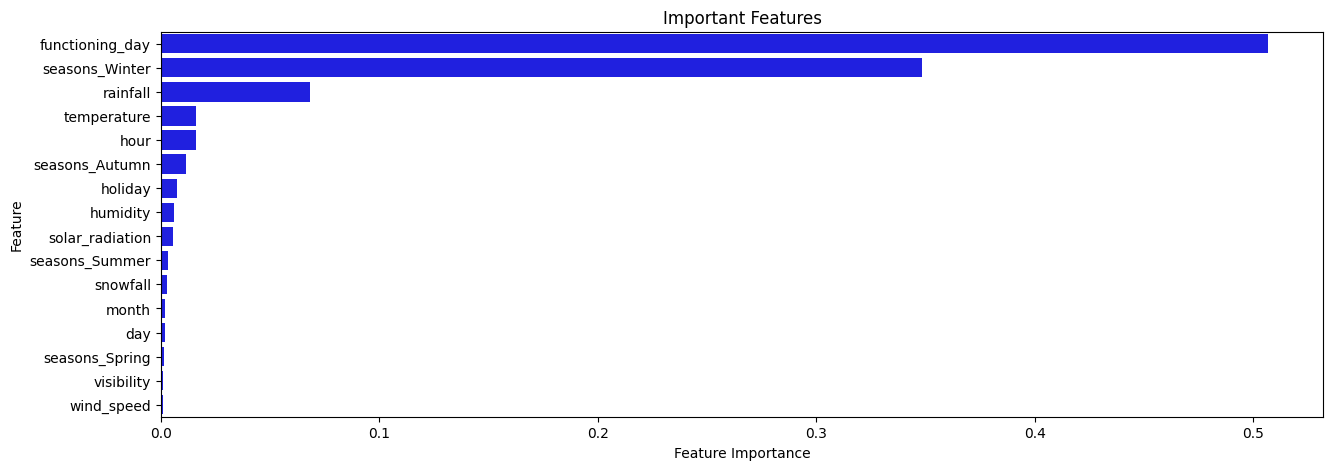

In [ ]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in XGB Model are season_winter, functioning_day, rainfall, hour, and season_autumn

### **8.11 Light GBM**

LightGBM is a tool for making predictions that's really good with big sets of data. It's made by Microsoft, and it's faster than other similar tools. It's good at making decisions by looking at groups of data points rather than one at a time. This makes it quicker and more efficient.


In [ ]:
 param_grid = {'n_estimators': [600,800],     # number of trees in the ensemble
             'max_depth': [8,10],            # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [2,3]}      # minimum number of samples which can be stored in a tree leaf.

lgb = LGBMRegressor()

grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 7008, numb

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2')

In [ ]:
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

LGBMRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
              n_estimators=600)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 7008, numb

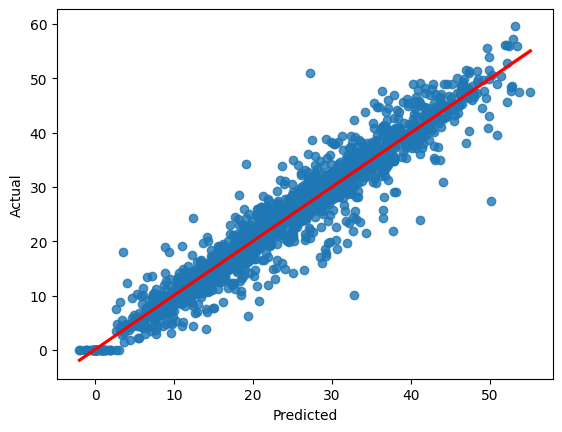

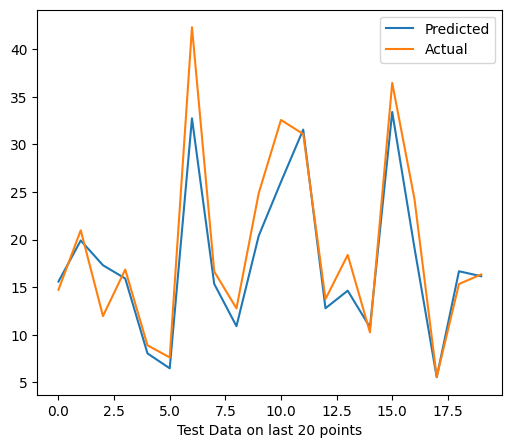

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.586568  19.903737  17.301467  15.909674  8.037663
error      -0.855648   1.072440  -5.343206   0.942626  0.850531
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(lgb_optimal_model, 'LGB')

####**Model Explainability**

In [ ]:
importances = lgb_optimal_model.feature_importances_
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature                3178
2          humidity                2398
0              hour                2286
4        visibility                2221
10              day                2007
3        wind_speed                1755
5   solar_radiation                1594
11            month                1185
6          rainfall                 427
12   seasons_Autumn                 171
8           holiday                 170
7          snowfall                 158
9   functioning_day                 151
13   seasons_Spring                 133
14   seasons_Summer                 101
15   seasons_Winter                  65

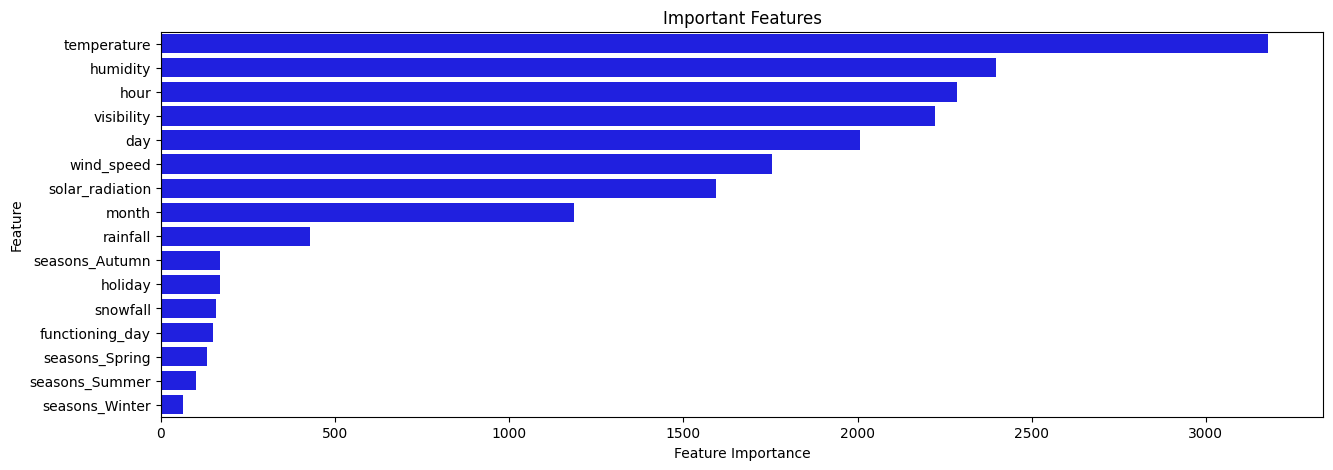

In [ ]:
plt.figure(figsize=(15,5))
bar=sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in XGB Model are temperature, humidity, visibility, hour, and day.

####**8.12 Model Result**

R square is a measure used to evaluate how well a regression model fits the dependent variables. However, it doesn't consider overfitting, which can be a problem if the model is too complex with many independent variables. Adjusted R Square is a better metric in such cases as it penalizes additional variables to prevent overfitting.

For predicting rented_bike_count, which depends on the relationship between independent and dependent variables, R square is a suitable evaluation method.

In [ ]:
model_result = pd.DataFrame(model_result)

model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
10               LGB      1.290    11.058       1.136      3.325      0.805   
9                XGB      0.070    11.524       0.265      3.395      0.180   
8           AdaBoost      2.248    14.130       1.499      3.759      1.121   
7      Random Forest      5.559    14.950       2.358      3.867      1.580   
6      Decision Tree     15.422    20.416       3.927      4.518      2.736   
5                SVM     20.542    26.094       4.532      5.108      2.685   
4                KNN     12.718    26.575       3.566      5.155      2.361   
0   LinearRegression     54.121    53.094       7.357      7.287      5.638   
2              Ridge     54.119    53.108       7.357      7.288      5.639   
1              Lasso     54.273    53.316       7.367      7.302      5.648   
3        Elastic Net     54.593    53.911       7.389      7.342      5.677   

    test MAE  train R2  test R2  train Adj R2  test Adj R2  
10     2.193     0.992    0.927         0.992        0.926  
9      2.273     1.000    0.924         1.000        0.923  
8      2.575     0.986    0.906         0.986        0.905  
7      2.635     0.964    0.901         0.964        0.900  
6      3.157     0.901    0.865         0.901        0.863  
5      3.326     0.868    0.827         0.868        0.825  
4      3.577     0.918    0.824         0.918        0.822  
0      5.618     0.653    0.648         0.652        0.645  
2      5.621     0.653    0.648         0.652        0.645  
1      5.636     0.652    0.647         0.651        0.643  
3      5.680     0.650    0.643         0.649        0.639

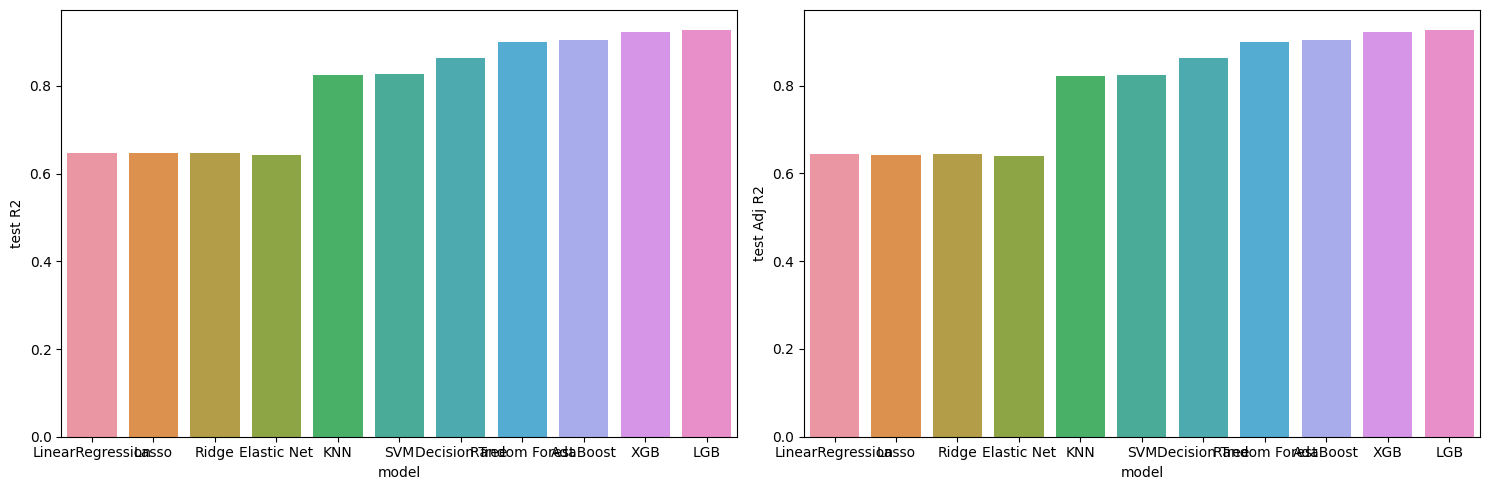

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])
plt.tight_layout()


**Based on the results provided, selecting either XGBoost (XGB) or LightGBM (LGB) Regressor as the final model seems reasonable since they have the lowest RMSE value and the highest R2 score on the test data. Opting for LightGBM (LGB) could be preferable, especially for large datasets, as it's known to handle such data efficiently and provides better feature explanations. Therefore, choosing LGB as the final model appears to be a suitable decision.**





##**Conclusion**

###**Summary**

Our analysis began with Exploratory Data Analysis (EDA) on our datasets. Initially, we focused on our dependent variable, "Rental Bike Count," exploring its characteristics and making any necessary transformations. Next, we delved into both categorical and numerical variables, investigating their correlations, distributions, and relationships with the dependent variable. We employed one-hot encoding for categorical variables and pruned numerical features with multicollinearity, which were solely used for EDA purposes.

Subsequently, we embarked on evaluating various individual models, starting from basic Linear Regression and progressing to Regularization Models (Ridge, Lasso, and Elastic Net), as well as more sophisticated ensemble models such as Random Forest, Gradient Boosting, and LightGBM. To optimize our model's performance, we conducted hyperparameter tuning to fine-tune the model parameters. This comprehensive approach allowed us to iteratively refine our model and select the best-performing algorithm for predicting rental bike counts.

####**Conclusion**


1. Here are some solutions to manage Bike Sharing Demand.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
*  Maintenance activities for bikes should be done at night due to the low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
2. We see 2 rental patterns across the day in bike rental count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Light GBM model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92.5%. Once we get more data we can retrain our algorithm for better performance.

####**Way Forward**

It's important to remember that the data we're working with changes over time. For example, things like temperature, wind speed, and solar radiation can vary a lot. This means our model might not always work perfectly because it's based on data that can change.

Machine learning is always getting better and changing too. So, we need to be ready for anything that might come up and keep an eye on our model to make sure it's still doing a good job. That's why it's crucial to keep learning and staying updated with the latest in machine learning. By doing this, we can make sure we're always ahead of the game and ready to tackle any challenges that come our way.